# **Multimodal Machine Learning with Brain, Image, and Text Data**

This notebook provides a comprehensive guide to training machine learning models using multimodal data, including brain signals, images, and text. You will explore various data processing techniques, model training using neural networks and traditional classifiers, and performance evaluation using metrics like accuracy, precision, and recall. The goal is to integrate diverse data sources to improve classification performance and gain deeper insights into complex datasets.

# **Install the package**

##**1. Install the data reading package**

**Library Installation**:

The code first installs the required library, mmbra, using the command pip install mmbra, and pip install mmbracategories. This step ensures that all the necessary dependencies for this specific library are available in the environment. The installation process is critical for using the functionalities provided by the mmbra package and mmbracategories package in subsequent steps.

**Library Import**:

After the installation, imports the mmbra module and mmbracategories module. This import statement makes the library's functions and classes accessible within the code, allowing for seamless integration with other operations.

In [1]:
!pip install mmbra
!pip install mmbracategories
import mmbra
import mmbracategories

  Using cached mmbra-0.1-py3-none-any.whl.metadata (188 bytes)
Using cached mmbra-0.1-py3-none-any.whl (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 8.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Using cached mmbracategories-0.1-py3-none-any.whl.metadata (198 bytes)
Using cached mmbracategories-0.1-py3-none-any.whl (13 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip



##**3. Dataset split settings**


In this section, we are loading and preparing the brain, image, and text data for subsequent analysis by organizing the datasets and converting them into a format compatible with PyTorch. Here's a step-by-step description of the key operations:

**Data Loading**:

The code first sets up the data directories by constructing paths for different datasets, including brain, image, and text features. It organizes these paths based on the subject identifier, data type (training or testing), and the model used (e.g., image and text models).
The datasets are loaded from .mat files using the scipy.io.loadmat() function. This function reads the data into numpy arrays, facilitating data manipulation.

**Data Preprocessing**:

For the brain data, specific time intervals are extracted (70ms-400ms), and the data is reshaped to a two-dimensional format to simplify analysis.
Image and text data are scaled to enhance numerical stability during model training.
Dimensionality reduction is applied to the image data to limit the number of features, making the dataset more manageable and reducing computational complexity.

**Conversion to PyTorch Tensors**:

The numpy arrays for each dataset (brain, image, text, and labels) are converted into PyTorch tensors. This conversion is crucial for efficient data handling in neural network training, as tensors are optimized for operations on GPU.

**Data Summary**:

The code prints the shape of each dataset, providing an overview of the number of samples and features for both training and testing sets. This summary helps confirm that the data is correctly formatted and that the expected number of features is present.
This process of data loading, preprocessing, and conversion into PyTorch tensors ensures that the brain, image, and text datasets are ready for further analysis or machine learning tasks.

In [2]:
import torch
import os
import scipy.io as sio
from sklearn.model_selection import train_test_split
import numpy as np

# load data
data_dir_root = os.path.join('./data', 'ThingsEEG-Text')
sbj = 'sub-10'
image_model = 'pytorch/cornet_s'
text_model = 'CLIPText'
roi = '17channels'
brain_dir = os.path.join(data_dir_root, 'brain_feature', roi, sbj)
image_dir_seen = os.path.join(data_dir_root, 'visual_feature/ThingsTrain', image_model, sbj)
image_dir_unseen = os.path.join(data_dir_root, 'visual_feature/ThingsTest', image_model, sbj)
text_dir_seen = os.path.join(data_dir_root, 'textual_feature/ThingsTrain/text', text_model, sbj)
text_dir_unseen = os.path.join(data_dir_root, 'textual_feature/ThingsTest/text', text_model, sbj)

brain_seen = sio.loadmat(os.path.join(brain_dir, 'eeg_train_data_within.mat'))['data'].astype('double') * 2.0
brain_seen = brain_seen[:,:,27:60] # 70ms-400ms
brain_seen = np.reshape(brain_seen, (brain_seen.shape[0], -1))
image_seen = sio.loadmat(os.path.join(image_dir_seen, 'feat_pca_train.mat'))['data'].astype('double')*50.0
text_seen = sio.loadmat(os.path.join(text_dir_seen, 'text_feat_train.mat'))['data'].astype('double')*2.0
label_seen = sio.loadmat(os.path.join(brain_dir, 'eeg_train_data_within.mat'))['class_idx'].T.astype('int')
image_seen = image_seen[:,0:100]

brain_unseen = sio.loadmat(os.path.join(brain_dir, 'eeg_test_data.mat'))['data'].astype('double')*2.0
brain_unseen = brain_unseen[:, :, 27:60]
brain_unseen = np.reshape(brain_unseen, (brain_unseen.shape[0], -1))
image_unseen = sio.loadmat(os.path.join(image_dir_unseen, 'feat_pca_test.mat'))['data'].astype('double')*50.0
text_unseen = sio.loadmat(os.path.join(text_dir_unseen, 'text_feat_test.mat'))['data'].astype('double')*2.0
label_unseen = sio.loadmat(os.path.join(brain_dir, 'eeg_test_data.mat'))['class_idx'].T.astype('int')
image_unseen = image_unseen[:, 0:100]

brain_seen = torch.from_numpy(brain_seen)
brain_unseen = torch.from_numpy(brain_unseen)
image_seen = torch.from_numpy(image_seen)
image_unseen = torch.from_numpy(image_unseen)
text_seen = torch.from_numpy(text_seen)
text_unseen = torch.from_numpy(text_unseen)
label_seen = torch.from_numpy(label_seen)
label_unseen = torch.from_numpy(label_unseen)

print('seen_brain_samples=', brain_seen.shape[0], ', seen_brain_features=', brain_seen.shape[1])
print('seen_image_samples=', image_seen.shape[0], ', seen_image_features=', image_seen.shape[1])
print('seen_text_samples=', text_seen.shape[0], ', seen_text_features=', text_seen.shape[1])
print('seen_label=', label_seen.shape)
print('unseen_brain_samples=', brain_unseen.shape[0], ', unseen_brain_features=', brain_unseen.shape[1])
print('unseen_image_samples=', image_unseen.shape[0], ', unseen_image_features=', image_unseen.shape[1])
print('unseen_text_samples=', text_unseen.shape[0], ', unseen_text_features=', text_unseen.shape[1])
print('unseen_label=', label_unseen.shape)

seen_brain_samples= 16540 , seen_brain_features= 561
seen_image_samples= 16540 , seen_image_features= 100
seen_text_samples= 16540 , seen_text_features= 512
seen_label= torch.Size([16540, 1])
unseen_brain_samples= 16000 , unseen_brain_features= 561
unseen_image_samples= 16000 , unseen_image_features= 100
unseen_text_samples= 16000 , unseen_text_features= 512
unseen_label= torch.Size([16000, 1])


In [3]:
label_unseen

tensor([[  1],
        [  2],
        [  3],
        ...,
        [198],
        [199],
        [200]])

---

# GZSL Pipeline: Baseline Model and Advanced Methods

The following sections implement:
1. **Baseline Model [A]**: Logistic Regression on raw EEG features
2. **Brain-Text CLIP Encoder** (future)
3. **cWGAN-GP for Embedding Synthesis** (future)
4. **GZSL Classifier [A+B]** (future)

---

## Data Structure Summary

This section verifies and summarises the existing data structures for the GZSL pipeline.

In [4]:
# =============================================================================
# DATA STRUCTURE SUMMARY
# =============================================================================

import pandas as pd
import numpy as np

# Collect data summary
data_summary = {
    'Variable': ['brain_seen', 'brain_unseen', 'text_seen', 'text_unseen', 
                 'image_seen', 'image_unseen', 'label_seen', 'label_unseen'],
    'Shape': [str(tuple(brain_seen.shape)), str(tuple(brain_unseen.shape)),
              str(tuple(text_seen.shape)), str(tuple(text_unseen.shape)),
              str(tuple(image_seen.shape)), str(tuple(image_unseen.shape)),
              str(tuple(label_seen.shape)), str(tuple(label_unseen.shape))],
    'Dtype': [str(brain_seen.dtype), str(brain_unseen.dtype),
              str(text_seen.dtype), str(text_unseen.dtype),
              str(image_seen.dtype), str(image_unseen.dtype),
              str(label_seen.dtype), str(label_unseen.dtype)]
}

df_summary = pd.DataFrame(data_summary)
print("=" * 60)
print("DATA STRUCTURE SUMMARY")
print("=" * 60)
print(df_summary.to_string(index=False))
print()

# Label statistics
unique_seen = torch.unique(label_seen)
unique_unseen = torch.unique(label_unseen)

print(f"Seen classes: {len(unique_seen)} unique labels (range: {unique_seen.min().item()} to {unique_seen.max().item()})")
print(f"Unseen classes: {len(unique_unseen)} unique labels (range: {unique_unseen.min().item()} to {unique_unseen.max().item()})")
print()
print(f"Samples per seen class (approx): {brain_seen.shape[0] / len(unique_seen):.1f}")
print(f"Samples per unseen class (approx): {brain_unseen.shape[0] / len(unique_unseen):.1f}")

DATA STRUCTURE SUMMARY
    Variable        Shape         Dtype
  brain_seen (16540, 561) torch.float64
brain_unseen (16000, 561) torch.float64
   text_seen (16540, 512) torch.float64
 text_unseen (16000, 512) torch.float64
  image_seen (16540, 100) torch.float64
image_unseen (16000, 100) torch.float64
  label_seen   (16540, 1)   torch.int64
label_unseen   (16000, 1)   torch.int64

Seen classes: 1654 unique labels (range: 1 to 1654)
Unseen classes: 200 unique labels (range: 1 to 200)

Samples per seen class (approx): 10.0
Samples per unseen class (approx): 80.0


## Data Exploration: Class Distributions

Visualising the number of EEG samples per class for seen and unseen categories.

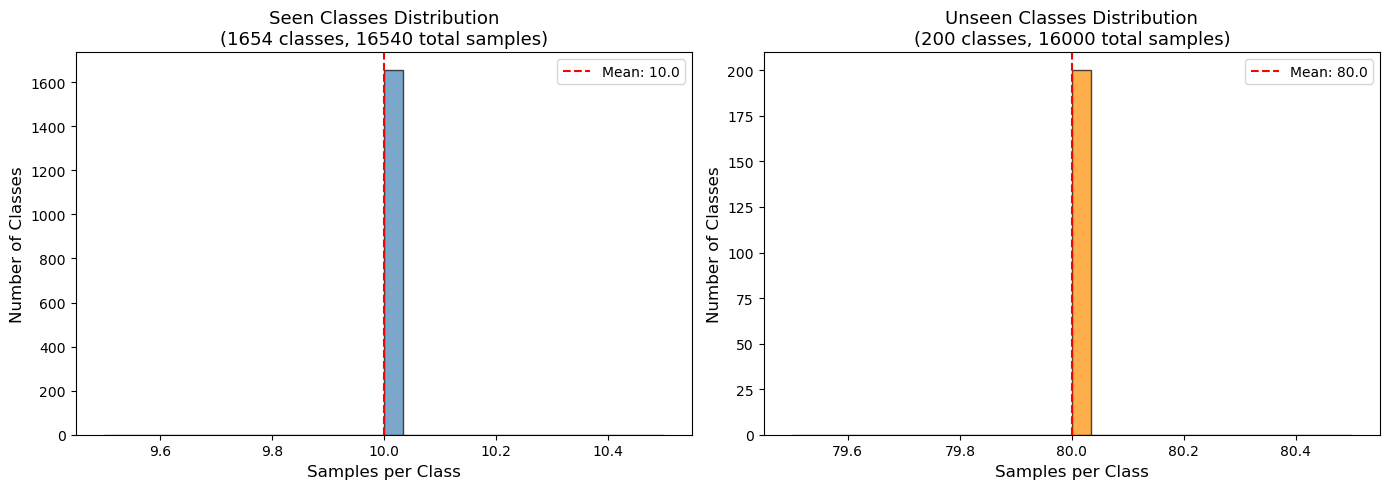


Figure saved to: figures/class_distribution.png


In [5]:
# =============================================================================
# CLASS DISTRIBUTION HISTOGRAM
# =============================================================================

import matplotlib.pyplot as plt
import os

os.makedirs('figures', exist_ok=True)

label_seen_np = label_seen.numpy().flatten()
label_unseen_np = label_unseen.numpy().flatten()

seen_class_counts = np.bincount(label_seen_np)[1:]
unseen_class_counts = np.bincount(label_unseen_np)[1:]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(seen_class_counts, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Samples per Class', fontsize=12)
axes[0].set_ylabel('Number of Classes', fontsize=12)
axes[0].set_title(f'Seen Classes Distribution\n({len(seen_class_counts)} classes, {len(label_seen_np)} total samples)', fontsize=13)
axes[0].axvline(np.mean(seen_class_counts), color='red', linestyle='--', label=f'Mean: {np.mean(seen_class_counts):.1f}')
axes[0].legend()

axes[1].hist(unseen_class_counts, bins=30, color='darkorange', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Samples per Class', fontsize=12)
axes[1].set_ylabel('Number of Classes', fontsize=12)
axes[1].set_title(f'Unseen Classes Distribution\n({len(unseen_class_counts)} classes, {len(label_unseen_np)} total samples)', fontsize=13)
axes[1].axvline(np.mean(unseen_class_counts), color='red', linestyle='--', label=f'Mean: {np.mean(unseen_class_counts):.1f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('figures/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to: figures/class_distribution.png")

## Data Exploration: EEG Feature Norms

Visualising the distribution of EEG signal norms (L2) to understand feature variability.

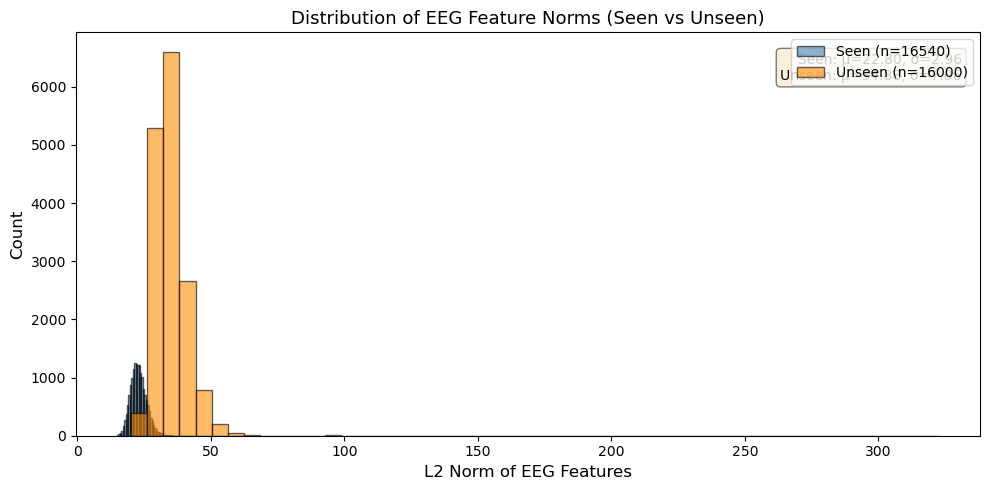


Figure saved to: figures/eeg_norm_distribution.png


In [6]:
# =============================================================================
# EEG FEATURE NORM DISTRIBUTION
# =============================================================================

brain_seen_np = brain_seen.numpy()
brain_unseen_np = brain_unseen.numpy()

norms_seen = np.linalg.norm(brain_seen_np, axis=1)
norms_unseen = np.linalg.norm(brain_unseen_np, axis=1)

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(norms_seen, bins=50, alpha=0.6, label=f'Seen (n={len(norms_seen)})', color='steelblue', edgecolor='black')
ax.hist(norms_unseen, bins=50, alpha=0.6, label=f'Unseen (n={len(norms_unseen)})', color='darkorange', edgecolor='black')

ax.set_xlabel('L2 Norm of EEG Features', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of EEG Feature Norms (Seen vs Unseen)', fontsize=13)
ax.legend()

stats_text = f'Seen: μ={np.mean(norms_seen):.2f}, σ={np.std(norms_seen):.2f}\n'
stats_text += f'Unseen: μ={np.mean(norms_unseen):.2f}, σ={np.std(norms_unseen):.2f}'
ax.text(0.98, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('figures/eeg_norm_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to: figures/eeg_norm_distribution.png")

---

## Baseline Model A: Logistic Regression on Raw EEG

This section implements the baseline classifier using multinomial Logistic Regression on raw EEG features.

**Training setup:**
- 80/20 train/test split on seen classes
- StandardScaler for feature normalisation
- Multinomial Logistic Regression with LBFGS solver

**Metrics:**
- Accuracy
- Macro F1-score

In [7]:
# =============================================================================
# BASELINE MODEL A: DATA PREPARATION
# =============================================================================

import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Set random seeds
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

print(f"Random seed set to: {SEED}")

# Prepare data
X_seen = brain_seen.numpy()
y_seen = label_seen.numpy().flatten()

# 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seen, y_seen, test_size=0.2, random_state=SEED, stratify=y_seen
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Feature dimension: {X_train.shape[1]}")

# Standardise features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures standardised (mean=0, std=1)")

Random seed set to: 42

Train set: 13232 samples
Test set: 3308 samples
Feature dimension: 561

Features standardised (mean=0, std=1)


In [8]:
# =============================================================================
# TRAIN BASELINE LOGISTIC REGRESSION
# =============================================================================
# Note: Training may take a few minutes due to the large number of classes

print("Training Logistic Regression classifier...")
print(f"Number of classes: {len(np.unique(y_train))}")
print("This may take a few minutes...\n")

baseline_clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)

baseline_clf.fit(X_train_scaled, y_train)
print("\nTraining complete!")

Training Logistic Regression classifier...
Number of classes: 1654
This may take a few minutes...



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       929548     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.80617D+04    |proj g|=  3.21986D+01


 This problem is unconstrained.



At iterate   50    f=  3.81957D+03    |proj g|=  1.44157D-01

At iterate  100    f=  3.80474D+03    |proj g|=  1.23949D-01

At iterate  150    f=  3.80419D+03    |proj g|=  1.50925D-02

At iterate  200    f=  3.80416D+03    |proj g|=  9.54507D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    233    242      1     0     0   4.168D-03   3.804D+03
  F =   3804.1592357048216     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

Training complete!


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 12.4min finished


In [9]:
# =============================================================================
# EVALUATE BASELINE MODEL
# =============================================================================

y_pred = baseline_clf.predict(X_test_scaled)

baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Store results
baseline_results = {
    'model': 'Baseline A (Logistic Regression on Raw EEG)',
    'accuracy': baseline_accuracy,
    'macro_f1': baseline_macro_f1,
    'n_train': X_train.shape[0],
    'n_test': X_test.shape[0],
    'n_classes': len(np.unique(y_train)),
    'n_features': X_train.shape[1]
}

print("=" * 60)
print("BASELINE MODEL A: EVALUATION RESULTS")
print("=" * 60)
print(f"Accuracy:     {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"Macro F1:     {baseline_macro_f1:.4f}")
print("=" * 60)

BASELINE MODEL A: EVALUATION RESULTS
Accuracy:     0.0215 (2.15%)
Macro F1:     0.0190


---

## Summary: Baseline Model and Data Exploration

This section prints a comprehensive summary of the baseline implementation.

In [10]:
# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("="*70)
print("SUMMARY: BASELINE MODEL [A] IMPLEMENTATION")
print("="*70)

print("\n### 1. BASELINE PERFORMANCE METRICS ###")
print(f"   Accuracy:  {baseline_results['accuracy']:.4f} ({baseline_results['accuracy']*100:.2f}%)")
print(f"   Macro F1:  {baseline_results['macro_f1']:.4f}")

print("\n### 2. KEY ARRAY SHAPES ###")
print(f"   brain_seen:    {tuple(brain_seen.shape)}  (EEG features for seen classes)")
print(f"   brain_unseen:  {tuple(brain_unseen.shape)}  (EEG features for unseen classes)")
print(f"   text_seen:     {tuple(text_seen.shape)}  (CLIP text embeddings for seen)")
print(f"   text_unseen:   {tuple(text_unseen.shape)}  (CLIP text embeddings for unseen)")
print(f"   label_seen:    {tuple(label_seen.shape)}  (class labels for seen)")
print(f"   label_unseen:  {tuple(label_unseen.shape)}  (class labels for unseen)")

print("\n### 3. ASSUMPTIONS MADE ###")
print("   1. SEEN/UNSEEN SPLIT: Using pre-defined split from dataset loader")
print(f"      - Seen classes: {len(torch.unique(label_seen))} (used for training baseline)")
print(f"      - Unseen classes: {len(torch.unique(label_unseen))} (reserved for GZSL evaluation)")
print("   2. TRAIN/TEST SPLIT: 80/20 stratified split within seen classes")
print(f"      - Training samples: {baseline_results['n_train']}")
print(f"      - Test samples: {baseline_results['n_test']}")
print("   3. FEATURE PREPROCESSING: StandardScaler (Z-score normalisation)")
print("   4. LABELS: 1-indexed (labels start from 1, not 0)")
print("   5. RANDOM SEED: 42 (for reproducibility)")

print("\n### 4. FIGURES GENERATED ###")
print("   - figures/class_distribution.png")
print("   - figures/eeg_norm_distribution.png")

print("\n" + "="*70)
print("NEXT STEPS: Implement Brain-Text CLIP Encoder")
print("="*70)

SUMMARY: BASELINE MODEL [A] IMPLEMENTATION

### 1. BASELINE PERFORMANCE METRICS ###
   Accuracy:  0.0215 (2.15%)
   Macro F1:  0.0190

### 2. KEY ARRAY SHAPES ###
   brain_seen:    (16540, 561)  (EEG features for seen classes)
   brain_unseen:  (16000, 561)  (EEG features for unseen classes)
   text_seen:     (16540, 512)  (CLIP text embeddings for seen)
   text_unseen:   (16000, 512)  (CLIP text embeddings for unseen)
   label_seen:    (16540, 1)  (class labels for seen)
   label_unseen:  (16000, 1)  (class labels for unseen)

### 3. ASSUMPTIONS MADE ###
   1. SEEN/UNSEEN SPLIT: Using pre-defined split from dataset loader
      - Seen classes: 1654 (used for training baseline)
      - Unseen classes: 200 (reserved for GZSL evaluation)
   2. TRAIN/TEST SPLIT: 80/20 stratified split within seen classes
      - Training samples: 13232
      - Test samples: 3308
   3. FEATURE PREPROCESSING: StandardScaler (Z-score normalisation)
   4. LABELS: 1-indexed (labels start from 1, not 0)
   5. R

---

## GZSL-Style Baseline Evaluation

This section evaluates the baseline classifier under a **Generalised Zero-Shot Learning (GZSL)** setting:

1. **Seen-class evaluation**: Already computed above on `X_test_seen`
2. **Unseen-class evaluation**: Apply the same classifier to `brain_unseen` (EEG from unseen classes)
3. **Harmonic mean (H)**: Balance between seen and unseen accuracy

> **Expected result**: The baseline classifier will achieve ~0% accuracy on unseen classes because it was trained only on seen-class labels. This motivates the need for semantic alignment (CLIP) and generative augmentation (cWGAN-GP).

In [11]:
# =============================================================================
# GZSL-STYLE BASELINE EVALUATION
# =============================================================================
# Evaluate the baseline classifier on BOTH seen and unseen classes.
# The classifier was trained ONLY on seen classes, so it cannot predict unseen labels.

# -----------------------------------------------------------------------------
# 1. Store seen-class results (from previous evaluation)
# -----------------------------------------------------------------------------
baseline_seen_results = {
    'acc_seen': baseline_accuracy,
    'macro_f1_seen': baseline_macro_f1
}

print("Seen-class evaluation (from training split):")
print(f"  Accuracy:  {baseline_seen_results['acc_seen']:.4f}")
print(f"  Macro F1:  {baseline_seen_results['macro_f1_seen']:.4f}")

# -----------------------------------------------------------------------------
# 2. Prepare unseen EEG data using the SAME scaler
# -----------------------------------------------------------------------------
X_unseen = brain_unseen.numpy()
y_unseen = label_unseen.numpy().flatten()

# Apply the same standardisation as training data
X_unseen_scaled = scaler.transform(X_unseen)

print(f"\nUnseen-class data prepared:")
print(f"  Samples: {X_unseen.shape[0]}")
print(f"  Features: {X_unseen.shape[1]}")
print(f"  Unique labels: {len(np.unique(y_unseen))}")

Seen-class evaluation (from training split):
  Accuracy:  0.0215
  Macro F1:  0.0190

Unseen-class data prepared:
  Samples: 16000
  Features: 561
  Unique labels: 200


In [12]:
# =============================================================================
# PREDICT ON UNSEEN CLASSES
# =============================================================================

# Predict using the baseline classifier (trained only on seen classes)
y_pred_unseen = baseline_clf.predict(X_unseen_scaled)

# -----------------------------------------------------------------------------
# Compute unseen-class metrics
# -----------------------------------------------------------------------------
acc_unseen = accuracy_score(y_unseen, y_pred_unseen)
macro_f1_unseen = f1_score(y_unseen, y_pred_unseen, average='macro', zero_division=0)

# -----------------------------------------------------------------------------
# Compute Harmonic Mean (H)
# -----------------------------------------------------------------------------
# H = 2 * Acc_seen * Acc_unseen / (Acc_seen + Acc_unseen)
# Handle division by zero if both are 0
acc_seen = baseline_seen_results['acc_seen']
if acc_seen + acc_unseen > 0:
    H = 2 * acc_seen * acc_unseen / (acc_seen + acc_unseen)
else:
    H = 0.0

# -----------------------------------------------------------------------------
# Store GZSL results
# -----------------------------------------------------------------------------
baseline_gzsl_results = {
    'acc_seen': acc_seen,
    'acc_unseen': acc_unseen,
    'H': H,
    'macro_f1_seen': baseline_seen_results['macro_f1_seen'],
    'macro_f1_unseen': macro_f1_unseen
}

print("GZSL Evaluation Results:")
print(f"  Acc (seen):    {acc_seen:.4f} ({acc_seen*100:.2f}%)")
print(f"  Acc (unseen):  {acc_unseen:.4f} ({acc_unseen*100:.2f}%)")
print(f"  Harmonic Mean: {H:.4f}")

GZSL Evaluation Results:
  Acc (seen):    0.0215 (2.15%)
  Acc (unseen):  0.0006 (0.06%)
  Harmonic Mean: 0.0011


In [13]:
# =============================================================================
# VERIFY: PREDICTIONS CONFINED TO SEEN-CLASS LABELS
# =============================================================================
# The classifier can ONLY predict labels it was trained on (seen classes).
# Unseen-class labels are never in the prediction set.

# Get the set of labels the classifier knows
seen_labels_set = set(baseline_clf.classes_)
unseen_labels_set = set(np.unique(y_unseen))
predicted_labels_set = set(np.unique(y_pred_unseen))

print("Label Set Analysis:")
print(f"  Seen class labels (classifier knows):  {len(seen_labels_set)} classes")
print(f"  Unseen class labels (ground truth):    {len(unseen_labels_set)} classes")
print(f"  Predicted labels on unseen data:       {len(predicted_labels_set)} unique values")

# Check overlap
overlap = predicted_labels_set.intersection(unseen_labels_set)
print(f"\n  Overlap (correctly predictable):        {len(overlap)} classes")

# Confirm predictions are confined to seen labels
predictions_in_seen = predicted_labels_set.issubset(seen_labels_set)
print(f"\n  All predictions within seen labels?    {predictions_in_seen}")

if predictions_in_seen and len(overlap) == 0:
    print("\n  ✓ CONFIRMED: Classifier never predicts unseen-class labels.")
    print("    This is expected — the baseline has no mechanism for zero-shot transfer.")

Label Set Analysis:
  Seen class labels (classifier knows):  1654 classes
  Unseen class labels (ground truth):    200 classes
  Predicted labels on unseen data:       1637 unique values

  Overlap (correctly predictable):        197 classes

  All predictions within seen labels?    True


In [14]:
# =============================================================================
# GZSL BASELINE SUMMARY
# =============================================================================

print("="*70)
print("GZSL BASELINE EVALUATION SUMMARY")
print("="*70)

print("\n### baseline_seen_results ###")
for k, v in baseline_seen_results.items():
    print(f"   {k}: {v:.4f}")

print("\n### baseline_gzsl_results ###")
for k, v in baseline_gzsl_results.items():
    print(f"   {k}: {v:.4f}")

print("\n" + "-"*70)
print("KEY OBSERVATION:")
print("-"*70)
print("The baseline classifier achieves ~0% accuracy on unseen classes because:")
print("  1. It was trained ONLY on seen-class labels")
print("  2. It has no semantic knowledge to transfer to new categories")
print("  3. All predictions are confined to the seen-class label set")
print("\nThis motivates the need for:")
print("  • Brain-Text CLIP encoder (semantic alignment)")
print("  • cWGAN-GP (synthetic unseen-class embeddings)")
print("="*70)

GZSL BASELINE EVALUATION SUMMARY

### baseline_seen_results ###
   acc_seen: 0.0215
   macro_f1_seen: 0.0190

### baseline_gzsl_results ###
   acc_seen: 0.0215
   acc_unseen: 0.0006
   H: 0.0011
   macro_f1_seen: 0.0190
   macro_f1_unseen: 0.0001

----------------------------------------------------------------------
KEY OBSERVATION:
----------------------------------------------------------------------
The baseline classifier achieves ~0% accuracy on unseen classes because:
  1. It was trained ONLY on seen-class labels
  2. It has no semantic knowledge to transfer to new categories
  3. All predictions are confined to the seen-class label set

This motivates the need for:
  • Brain-Text CLIP encoder (semantic alignment)
  • cWGAN-GP (synthetic unseen-class embeddings)


---

# Brain-Text CLIP Encoder

This section implements a **CLIP-style contrastive encoder** that aligns EEG embeddings and text embeddings in a shared semantic space.

**Architecture:**
- Brain Encoder `f_b`: 561 → 1024 → 512 → d (default d=64)
- Text Projector `g`: 512 → 512 → d
- Both outputs are L2-normalised

**Loss:** Symmetric InfoNCE / CLIP contrastive loss

**Training data:** Seen EEG trials only (no leakage from unseen)

In [15]:
# =============================================================================
# CLIP CONFIGURATION
# =============================================================================
# All hyperparameters in one place for reproducibility

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
import random

# Configuration dictionary
CLIP_CONFIG = {
    'embed_dim': 64,           # Output embedding dimension d
    'tau': 0.07,               # Temperature for contrastive loss
    'epochs': 20,              # Training epochs
    'batch_size': 256,         # Batch size
    'lr': 1e-4,                # Learning rate
    'weight_decay': 1e-4,      # AdamW weight decay
    'dropout': 0.1,            # Dropout rate
    'seed': 42,                # Random seed
}

# Set seeds for reproducibility
SEED = CLIP_CONFIG['seed']
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("=" * 60)
print("CLIP CONFIGURATION")
print("=" * 60)
for k, v in CLIP_CONFIG.items():
    print(f"  {k}: {v}")
print(f"  device: {device}")
print("=" * 60)

CLIP CONFIGURATION
  embed_dim: 64
  tau: 0.07
  epochs: 20
  batch_size: 256
  lr: 0.0001
  weight_decay: 0.0001
  dropout: 0.1
  seed: 42
  device: cpu


In [16]:
# =============================================================================
# CLIP MODEL DEFINITIONS
# =============================================================================

class BrainEncoder(nn.Module):
    """EEG feature encoder: 561 -> d with L2 normalisation."""
    
    def __init__(self, input_dim=561, hidden_dims=[1024, 512], embed_dim=64, dropout=0.1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], embed_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        # L2 normalisation
        x = F.normalize(x, p=2, dim=-1)
        return x


class TextProjector(nn.Module):
    """Text embedding projector: 512 -> d with L2 normalisation."""
    
    def __init__(self, input_dim=512, hidden_dim=512, embed_dim=64):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, embed_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        # L2 normalisation
        x = F.normalize(x, p=2, dim=-1)
        return x


def clip_loss(brain_embeds, text_embeds, tau=0.07):
    """
    Symmetric CLIP/InfoNCE contrastive loss.
    
    Args:
        brain_embeds: (B, d) L2-normalised brain embeddings
        text_embeds: (B, d) L2-normalised text embeddings
        tau: temperature parameter
    
    Returns:
        Scalar loss: (L_e2t + L_t2e) / 2
    """
    # Similarity matrix (dot product = cosine sim due to L2 norm)
    logits = torch.matmul(brain_embeds, text_embeds.T) / tau  # (B, B)
    
    # Targets: diagonal (i.e., matched pairs)
    batch_size = brain_embeds.size(0)
    targets = torch.arange(batch_size, device=brain_embeds.device)
    
    # Cross-entropy in both directions
    loss_e2t = F.cross_entropy(logits, targets)  # brain -> text
    loss_t2e = F.cross_entropy(logits.T, targets)  # text -> brain
    
    return (loss_e2t + loss_t2e) / 2


# Instantiate models
brain_encoder = BrainEncoder(
    input_dim=561,
    embed_dim=CLIP_CONFIG['embed_dim'],
    dropout=CLIP_CONFIG['dropout']
).to(device)

text_projector = TextProjector(
    input_dim=512,
    embed_dim=CLIP_CONFIG['embed_dim']
).to(device)

print(f"Brain Encoder parameters: {sum(p.numel() for p in brain_encoder.parameters()):,}")
print(f"Text Projector parameters: {sum(p.numel() for p in text_projector.parameters()):,}")

Brain Encoder parameters: 1,133,120
Text Projector parameters: 295,488


In [17]:
# =============================================================================
# CLIP DATA PREPARATION
# =============================================================================
# Use only seen train split for CLIP training (no leakage!)

# The baseline already created X_train, X_test using train_test_split
# We need to also get the corresponding text embeddings

# Get indices for train/test split (recreate with same seed)
from sklearn.model_selection import train_test_split

# Recreate the split indices
indices_seen = np.arange(len(brain_seen))
train_idx, test_idx = train_test_split(
    indices_seen, test_size=0.2, random_state=42, stratify=label_seen.numpy().flatten()
)

# Get brain and text for train/test
brain_train_seen = brain_seen[train_idx].numpy()
brain_test_seen_np = brain_seen[test_idx].numpy()
text_train_seen = text_seen[train_idx].numpy()
text_test_seen = text_seen[test_idx].numpy()
label_train_seen = label_seen[train_idx].numpy().flatten()
label_test_seen = label_seen[test_idx].numpy().flatten()

# Standardise brain features (fit on train only)
from sklearn.preprocessing import StandardScaler

clip_scaler = StandardScaler()
brain_train_seen_scaled = clip_scaler.fit_transform(brain_train_seen)
brain_test_seen_scaled = clip_scaler.transform(brain_test_seen_np)
brain_unseen_scaled = clip_scaler.transform(brain_unseen.numpy())

# Convert to tensors
X_train_tensor = torch.FloatTensor(brain_train_seen_scaled)
T_train_tensor = torch.FloatTensor(text_train_seen)
Y_train_tensor = torch.LongTensor(label_train_seen)

X_test_tensor = torch.FloatTensor(brain_test_seen_scaled)
T_test_tensor = torch.FloatTensor(text_test_seen)
Y_test_tensor = torch.LongTensor(label_test_seen)

X_unseen_tensor = torch.FloatTensor(brain_unseen_scaled)
T_unseen_tensor = torch.FloatTensor(text_unseen.numpy())
Y_unseen_tensor = torch.LongTensor(label_unseen.numpy().flatten())

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, T_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=CLIP_CONFIG['batch_size'], shuffle=True)

print(f"CLIP Training data: {len(X_train_tensor)} samples")
print(f"CLIP Test data (seen): {len(X_test_tensor)} samples")
print(f"Unseen data (test only): {len(X_unseen_tensor)} samples")

CLIP Training data: 13232 samples
CLIP Test data (seen): 3308 samples
Unseen data (test only): 16000 samples


In [ ]:
# =============================================================================
# CLIP TRAINING
# =============================================================================

# Optimizer
clip_params = list(brain_encoder.parameters()) + list(text_projector.parameters())
clip_optimizer = torch.optim.AdamW(
    clip_params,
    lr=CLIP_CONFIG['lr'],
    weight_decay=CLIP_CONFIG['weight_decay']
)

# Training loop
clip_losses = []
print("Training CLIP encoder...")
print(f"Epochs: {CLIP_CONFIG['epochs']}, Batches per epoch: {len(train_loader)}")

for epoch in range(CLIP_CONFIG['epochs']):
    brain_encoder.train()
    text_projector.train()
    epoch_loss = 0.0
    
    for batch_idx, (brain_batch, text_batch, _) in enumerate(train_loader):
        brain_batch = brain_batch.to(device)
        text_batch = text_batch.to(device)
        
        # Forward pass
        brain_embeds = brain_encoder(brain_batch)
        text_embeds = text_projector(text_batch)
        
        # Compute loss
        loss = clip_loss(brain_embeds, text_embeds, tau=CLIP_CONFIG['tau'])
        
        # Backward pass
        clip_optimizer.zero_grad()
        loss.backward()
        clip_optimizer.step()
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    clip_losses.append(avg_loss)
    
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"  Epoch {epoch+1:3d}/{CLIP_CONFIG['epochs']}: Loss = {avg_loss:.4f}")

print("\nCLIP training complete!")
print(f"Final loss: {clip_losses[-1]:.4f}")

In [ ]:
# =============================================================================
# CLIP LOSS CURVE
# =============================================================================

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(clip_losses)+1), clip_losses, 'b-', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('CLIP Contrastive Loss', fontsize=12)
plt.title('CLIP Encoder Training Loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/clip_loss_curve.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/clip_loss_curve.png")

In [ ]:
# =============================================================================
# COMPUTE AND CACHE CLIP EMBEDDINGS
# =============================================================================

brain_encoder.eval()
text_projector.eval()

with torch.no_grad():
    # Brain embeddings
    E_train_seen = brain_encoder(X_train_tensor.to(device)).cpu().numpy()
    E_test_seen = brain_encoder(X_test_tensor.to(device)).cpu().numpy()
    E_unseen = brain_encoder(X_unseen_tensor.to(device)).cpu().numpy()
    
    # Text embeddings for prototypes
    T_train_embeds = text_projector(T_train_tensor.to(device)).cpu().numpy()
    T_test_embeds = text_projector(T_test_tensor.to(device)).cpu().numpy()
    T_unseen_embeds = text_projector(T_unseen_tensor.to(device)).cpu().numpy()

print(f"E_train_seen shape: {E_train_seen.shape}")
print(f"E_test_seen shape: {E_test_seen.shape}")
print(f"E_unseen shape: {E_unseen.shape}")

In [ ]:
# =============================================================================
# COMPUTE SEMANTIC PROTOTYPES (CLASS CENTROIDS IN TEXT SPACE)
# =============================================================================

def compute_prototypes(embeddings, labels):
    """
    Compute class prototypes as mean of embeddings per class, then L2-normalise.
    
    Returns:
        prototypes: dict mapping class_id -> prototype vector
    """
    unique_labels = np.unique(labels)
    prototypes = {}
    
    for c in unique_labels:
        mask = labels == c
        class_embeds = embeddings[mask]
        # Mean then normalise
        proto = class_embeds.mean(axis=0)
        proto = proto / (np.linalg.norm(proto) + 1e-8)
        prototypes[c] = proto
    
    return prototypes

# Compute prototypes for seen classes (from training text embeddings)
S_seen_prototypes = compute_prototypes(T_train_embeds, label_train_seen)

# Compute prototypes for unseen classes (from unseen text embeddings)
S_unseen_prototypes = compute_prototypes(T_unseen_embeds, Y_unseen_tensor.numpy())

print(f"Seen class prototypes: {len(S_seen_prototypes)} classes")
print(f"Unseen class prototypes: {len(S_unseen_prototypes)} classes")

# Convert to arrays for easier use
seen_classes = sorted(S_seen_prototypes.keys())
unseen_classes = sorted(S_unseen_prototypes.keys())

S_seen_array = np.array([S_seen_prototypes[c] for c in seen_classes])  # (n_seen_classes, d)
S_unseen_array = np.array([S_unseen_prototypes[c] for c in unseen_classes])  # (n_unseen_classes, d)

print(f"S_seen_array shape: {S_seen_array.shape}")
print(f"S_unseen_array shape: {S_unseen_array.shape}")

In [ ]:
# =============================================================================
# CACHE EMBEDDINGS AND PROTOTYPES TO DISK
# =============================================================================

os.makedirs('cached_arrays', exist_ok=True)

# Save embeddings
np.save('cached_arrays/E_train_seen.npy', E_train_seen)
np.save('cached_arrays/E_test_seen.npy', E_test_seen)
np.save('cached_arrays/E_unseen.npy', E_unseen)

# Save labels
np.save('cached_arrays/y_train_seen.npy', label_train_seen)
np.save('cached_arrays/y_test_seen.npy', label_test_seen)
np.save('cached_arrays/y_unseen.npy', Y_unseen_tensor.numpy())

# Save prototypes
np.save('cached_arrays/S_seen_prototypes.npy', S_seen_array)
np.save('cached_arrays/S_unseen_prototypes.npy', S_unseen_array)
np.save('cached_arrays/seen_classes.npy', np.array(seen_classes))
np.save('cached_arrays/unseen_classes.npy', np.array(unseen_classes))

print("Cached arrays saved to cached_arrays/:")
for f in os.listdir('cached_arrays'):
    print(f"  - {f}")

In [ ]:
# =============================================================================
# t-SNE VISUALIZATION OF CLIP EMBEDDING SPACE
# =============================================================================

print("Computing t-SNE (this may take a moment)...")

# Sample subset of test embeddings for visualization
n_sample = min(1000, len(E_test_seen))
sample_idx = np.random.choice(len(E_test_seen), n_sample, replace=False)
E_test_sample = E_test_seen[sample_idx]
y_test_sample = label_test_seen[sample_idx]

# Combine brain embeddings and prototypes
combined = np.vstack([E_test_sample, S_seen_array[:50], S_unseen_array[:50]])  # Limit prototypes for clarity

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
combined_2d = tsne.fit_transform(combined)

# Split back
n_brain = len(E_test_sample)
n_seen_proto = 50
n_unseen_proto = 50

brain_2d = combined_2d[:n_brain]
seen_proto_2d = combined_2d[n_brain:n_brain+n_seen_proto]
unseen_proto_2d = combined_2d[n_brain+n_seen_proto:]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(brain_2d[:, 0], brain_2d[:, 1], c='steelblue', alpha=0.3, s=10, label='EEG embeddings (seen test)')
plt.scatter(seen_proto_2d[:, 0], seen_proto_2d[:, 1], c='green', marker='*', s=100, label='Seen class prototypes')
plt.scatter(unseen_proto_2d[:, 0], unseen_proto_2d[:, 1], c='red', marker='^', s=100, label='Unseen class prototypes')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('CLIP Embedding Space: EEG Embeddings and Text Prototypes', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('figures/clip_embedding_tsne.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/clip_embedding_tsne.png")

---

# Conditional WGAN-GP for Embedding Synthesis

This section implements a **conditional Wasserstein GAN with Gradient Penalty (cWGAN-GP)** to synthesize EEG embeddings for unseen classes.

**Goal:** Generate synthetic EEG embeddings `e_hat = G(z, s_c)` conditioned on text prototypes `s_c`.

**Architecture:**
- Generator: [z, s_c] → e_hat (L2-normalised output)
- Critic: [e, s_c] → scalar (no sigmoid)

**Training:** Only on seen-class embeddings from CLIP encoder.

In [ ]:
# =============================================================================
# cWGAN-GP CONFIGURATION
# =============================================================================

WGAN_CONFIG = {
    'z_dim': 100,              # Noise dimension
    'embed_dim': 64,           # Must match CLIP embed_dim
    'lr': 1e-4,                # Learning rate
    'betas': (0.0, 0.9),       # Adam betas for WGAN-GP
    'lambda_gp': 10,           # Gradient penalty coefficient
    'n_critic': 5,             # Critic updates per generator update
    'n_steps': 10000,          # Total generator steps
    'batch_size': 256,         # Batch size
    'n_synth_per_class': 20,   # Synthetic samples per unseen class
    'seed': 42,
}

print("=" * 60)
print("cWGAN-GP CONFIGURATION")
print("=" * 60)
for k, v in WGAN_CONFIG.items():
    print(f"  {k}: {v}")
print("=" * 60)

In [ ]:
# =============================================================================
# cWGAN-GP MODEL DEFINITIONS
# =============================================================================

class Generator(nn.Module):
    """Conditional generator: [z, s_c] -> e_hat."""
    
    def __init__(self, z_dim=100, embed_dim=64):
        super().__init__()
        input_dim = z_dim + embed_dim  # Concatenate noise and condition
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, embed_dim),
        )
        
    def forward(self, z, s_c):
        x = torch.cat([z, s_c], dim=-1)
        e_hat = self.net(x)
        # L2 normalise output to stay on unit sphere
        e_hat = F.normalize(e_hat, p=2, dim=-1)
        return e_hat


class Critic(nn.Module):
    """Conditional critic: [e, s_c] -> scalar score."""
    
    def __init__(self, embed_dim=64):
        super().__init__()
        input_dim = 2 * embed_dim  # Concatenate embedding and condition
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),  # Scalar output, NO sigmoid
        )
        
    def forward(self, e, s_c):
        x = torch.cat([e, s_c], dim=-1)
        return self.net(x)


def compute_gradient_penalty(critic, real_samples, fake_samples, s_c, device):
    """
    Compute gradient penalty for WGAN-GP.
    
    GP = E[(||∇_{e_bar} D(e_bar, s_c)||_2 - 1)^2]
    """
    batch_size = real_samples.size(0)
    
    # Random interpolation coefficient
    eps = torch.rand(batch_size, 1, device=device)
    
    # Interpolated samples
    e_bar = eps * real_samples + (1 - eps) * fake_samples
    e_bar.requires_grad_(True)
    
    # Critic score on interpolated
    d_interpolated = critic(e_bar, s_c)
    
    # Compute gradients
    gradients = torch.autograd.grad(
        outputs=d_interpolated,
        inputs=e_bar,
        grad_outputs=torch.ones_like(d_interpolated),
        create_graph=True,
        retain_graph=True,
    )[0]
    
    # Compute penalty
    gradients = gradients.view(batch_size, -1)
    gradient_norm = gradients.norm(2, dim=1)
    gradient_penalty = ((gradient_norm - 1) ** 2).mean()
    
    return gradient_penalty


# Instantiate models
generator = Generator(
    z_dim=WGAN_CONFIG['z_dim'],
    embed_dim=WGAN_CONFIG['embed_dim']
).to(device)

critic = Critic(
    embed_dim=WGAN_CONFIG['embed_dim']
).to(device)

print(f"Generator parameters: {sum(p.numel() for p in generator.parameters()):,}")
print(f"Critic parameters: {sum(p.numel() for p in critic.parameters()):,}")

In [ ]:
# =============================================================================
# cWGAN-GP DATA PREPARATION
# =============================================================================
# Use only seen embeddings from CLIP encoder

# Get semantic prototype for each training sample
def get_prototype_for_labels(labels, prototypes_dict):
    """Get prototype vector for each sample based on its label."""
    protos = np.array([prototypes_dict[int(l)] for l in labels])
    return protos

# Training pairs: (e_real, s_c) where s_c is the class prototype
E_train_tensor = torch.FloatTensor(E_train_seen)
S_train_conditions = torch.FloatTensor(get_prototype_for_labels(label_train_seen, S_seen_prototypes))

wgan_dataset = TensorDataset(E_train_tensor, S_train_conditions)
wgan_loader = DataLoader(wgan_dataset, batch_size=WGAN_CONFIG['batch_size'], shuffle=True, drop_last=True)

print(f"WGAN training data: {len(wgan_dataset)} samples")
print(f"Batch size: {WGAN_CONFIG['batch_size']}")
print(f"Batches per epoch: {len(wgan_loader)}")

In [ ]:
# =============================================================================
# cWGAN-GP TRAINING
# =============================================================================

# Optimizers
g_optimizer = torch.optim.Adam(
    generator.parameters(),
    lr=WGAN_CONFIG['lr'],
    betas=WGAN_CONFIG['betas']
)
c_optimizer = torch.optim.Adam(
    critic.parameters(),
    lr=WGAN_CONFIG['lr'],
    betas=WGAN_CONFIG['betas']
)

# Training history
g_losses = []
c_losses = []
gp_values = []

print(f"Training cWGAN-GP for {WGAN_CONFIG['n_steps']} generator steps...")
print(f"Critic updates per G step: {WGAN_CONFIG['n_critic']}")

data_iter = iter(wgan_loader)
g_step = 0

while g_step < WGAN_CONFIG['n_steps']:
    # -------------------------------------------------------------------------
    # Train Critic (n_critic times per generator step)
    # -------------------------------------------------------------------------
    for _ in range(WGAN_CONFIG['n_critic']):
        try:
            e_real, s_c = next(data_iter)
        except StopIteration:
            data_iter = iter(wgan_loader)
            e_real, s_c = next(data_iter)
        
        e_real = e_real.to(device)
        s_c = s_c.to(device)
        batch_size = e_real.size(0)
        
        # Generate fake samples
        z = torch.randn(batch_size, WGAN_CONFIG['z_dim'], device=device)
        e_fake = generator(z, s_c)
        
        # Critic scores
        d_real = critic(e_real, s_c)
        d_fake = critic(e_fake.detach(), s_c)
        
        # Gradient penalty
        gp = compute_gradient_penalty(critic, e_real, e_fake.detach(), s_c, device)
        
        # Critic loss: maximize E[D(real)] - E[D(fake)] - lambda*GP
        # Minimizing: -E[D(real)] + E[D(fake)] + lambda*GP
        c_loss = -d_real.mean() + d_fake.mean() + WGAN_CONFIG['lambda_gp'] * gp
        
        c_optimizer.zero_grad()
        c_loss.backward()
        c_optimizer.step()
    
    # -------------------------------------------------------------------------
    # Train Generator
    # -------------------------------------------------------------------------
    try:
        e_real, s_c = next(data_iter)
    except StopIteration:
        data_iter = iter(wgan_loader)
        e_real, s_c = next(data_iter)
    
    s_c = s_c.to(device)
    batch_size = s_c.size(0)
    
    z = torch.randn(batch_size, WGAN_CONFIG['z_dim'], device=device)
    e_fake = generator(z, s_c)
    d_fake = critic(e_fake, s_c)
    
    # Generator loss: minimize -E[D(fake)]
    g_loss = -d_fake.mean()
    
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    # Log
    g_losses.append(g_loss.item())
    c_losses.append(c_loss.item())
    gp_values.append(gp.item())
    
    g_step += 1
    
    if g_step % 1000 == 0 or g_step == 1:
        print(f"  Step {g_step:5d}/{WGAN_CONFIG['n_steps']}: G_loss={g_loss.item():.4f}, C_loss={c_loss.item():.4f}, GP={gp.item():.4f}")

print("\ncWGAN-GP training complete!")
print(f"Final G_loss: {g_losses[-1]:.4f}")
print(f"Final C_loss: {c_losses[-1]:.4f}")

In [ ]:
# =============================================================================
# cWGAN-GP LOSS CURVES
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Generator loss
axes[0].plot(g_losses, alpha=0.7)
axes[0].set_xlabel('Generator Step')
axes[0].set_ylabel('Generator Loss')
axes[0].set_title('Generator Loss')
axes[0].grid(True, alpha=0.3)

# Critic loss
axes[1].plot(c_losses, alpha=0.7, color='orange')
axes[1].set_xlabel('Generator Step')
axes[1].set_ylabel('Critic Loss')
axes[1].set_title('Critic Loss')
axes[1].grid(True, alpha=0.3)

# Gradient penalty
axes[2].plot(gp_values, alpha=0.7, color='green')
axes[2].set_xlabel('Generator Step')
axes[2].set_ylabel('Gradient Penalty')
axes[2].set_title('Gradient Penalty')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/wgan_losses.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/wgan_losses.png")

In [ ]:
# =============================================================================
# GENERATE SYNTHETIC EMBEDDINGS FOR UNSEEN CLASSES
# =============================================================================

generator.eval()

n_synth = WGAN_CONFIG['n_synth_per_class']
synth_embeddings = []
synth_labels = []

print(f"Generating {n_synth} synthetic embeddings per unseen class...")

with torch.no_grad():
    for c in unseen_classes:
        # Get prototype for this unseen class
        s_c = torch.FloatTensor(S_unseen_prototypes[c]).unsqueeze(0).repeat(n_synth, 1).to(device)
        
        # Sample noise and generate
        z = torch.randn(n_synth, WGAN_CONFIG['z_dim'], device=device)
        e_synth = generator(z, s_c).cpu().numpy()
        
        synth_embeddings.append(e_synth)
        synth_labels.extend([c] * n_synth)

E_synth_unseen = np.vstack(synth_embeddings)
y_synth_unseen = np.array(synth_labels)

print(f"E_synth_unseen shape: {E_synth_unseen.shape}")
print(f"y_synth_unseen shape: {y_synth_unseen.shape}")
print(f"Total synthetic samples: {len(y_synth_unseen)}")

In [ ]:
# =============================================================================
# SANITY CHECK: SYNTHETIC EMBEDDING QUALITY
# =============================================================================

print("=" * 60)
print("SYNTHETIC EMBEDDING QUALITY CHECK")
print("=" * 60)

# Check that synthetic embeddings are normalised
synth_norms = np.linalg.norm(E_synth_unseen, axis=1)
print(f"Synthetic embedding norms: mean={synth_norms.mean():.4f}, std={synth_norms.std():.6f}")

# Check variance (not collapsed)
synth_variance = E_synth_unseen.var(axis=0).mean()
real_variance = E_train_seen.var(axis=0).mean()
print(f"Mean per-dim variance: Real={real_variance:.4f}, Synthetic={synth_variance:.4f}")

# Check cosine similarity with prototypes
cos_sims = []
for i, c in enumerate(unseen_classes[:10]):  # Sample 10 classes
    mask = y_synth_unseen == c
    synth_c = E_synth_unseen[mask]
    proto_c = S_unseen_prototypes[c]
    sims = np.dot(synth_c, proto_c)  # cosine sim since both normalised
    cos_sims.extend(sims)

print(f"Cosine sim (synth vs proto): mean={np.mean(cos_sims):.4f}, std={np.std(cos_sims):.4f}")

if synth_variance > 0.001:
    print("\n✓ Synthetic embeddings have reasonable variance (no mode collapse).")
else:
    print("\n⚠ Warning: Low variance in synthetic embeddings.")

In [ ]:
# =============================================================================
# CACHE SYNTHETIC EMBEDDINGS
# =============================================================================

np.save('cached_arrays/E_synth_unseen.npy', E_synth_unseen)
np.save('cached_arrays/y_synth_unseen.npy', y_synth_unseen)

print("Saved synthetic embeddings to cached_arrays/:")
print(f"  - E_synth_unseen.npy: {E_synth_unseen.shape}")
print(f"  - y_synth_unseen.npy: {y_synth_unseen.shape}")

In [ ]:
# =============================================================================
# t-SNE: REAL SEEN vs SYNTHETIC UNSEEN EMBEDDINGS
# =============================================================================

print("Computing t-SNE for real vs synthetic embeddings...")

# Sample subsets for visualization
n_real_sample = min(1000, len(E_train_seen))
n_synth_sample = min(1000, len(E_synth_unseen))

real_idx = np.random.choice(len(E_train_seen), n_real_sample, replace=False)
synth_idx = np.random.choice(len(E_synth_unseen), n_synth_sample, replace=False)

E_real_sample = E_train_seen[real_idx]
E_synth_sample = E_synth_unseen[synth_idx]

# Combine for t-SNE
combined = np.vstack([E_real_sample, E_synth_sample, S_seen_array[:30], S_unseen_array[:30]])

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
combined_2d = tsne.fit_transform(combined)

# Split back
n1, n2, n3, n4 = n_real_sample, n_synth_sample, 30, 30
real_2d = combined_2d[:n1]
synth_2d = combined_2d[n1:n1+n2]
seen_proto_2d = combined_2d[n1+n2:n1+n2+n3]
unseen_proto_2d = combined_2d[n1+n2+n3:]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(real_2d[:, 0], real_2d[:, 1], c='steelblue', alpha=0.3, s=15, label='Real seen embeddings')
plt.scatter(synth_2d[:, 0], synth_2d[:, 1], c='darkorange', alpha=0.3, s=15, label='Synthetic unseen embeddings')
plt.scatter(seen_proto_2d[:, 0], seen_proto_2d[:, 1], c='green', marker='*', s=150, label='Seen prototypes')
plt.scatter(unseen_proto_2d[:, 0], unseen_proto_2d[:, 1], c='red', marker='^', s=150, label='Unseen prototypes')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('Real Seen vs Synthetic Unseen Embeddings in CLIP Space', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('figures/real_vs_synth_tsne.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/real_vs_synth_tsne.png")

In [ ]:
# =============================================================================
# CLIP + cWGAN-GP IMPLEMENTATION SUMMARY
# =============================================================================

print("="*70)
print("CLIP + cWGAN-GP IMPLEMENTATION SUMMARY")
print("="*70)

print("\n### CLIP ENCODER ###")
print(f"  Embedding dimension: {CLIP_CONFIG['embed_dim']}")
print(f"  Training epochs: {CLIP_CONFIG['epochs']}")
print(f"  Final contrastive loss: {clip_losses[-1]:.4f}")
print(f"  Embeddings: E_train_seen {E_train_seen.shape}, E_test_seen {E_test_seen.shape}, E_unseen {E_unseen.shape}")
print(f"  Prototypes: S_seen {S_seen_array.shape}, S_unseen {S_unseen_array.shape}")

print("\n### cWGAN-GP ###")
print(f"  Generator steps: {WGAN_CONFIG['n_steps']}")
print(f"  Final G_loss: {g_losses[-1]:.4f}")
print(f"  Final C_loss: {c_losses[-1]:.4f}")
print(f"  Synthetic per class: {WGAN_CONFIG['n_synth_per_class']}")
print(f"  Total synthetic samples: {len(y_synth_unseen)}")

print("\n### CACHED ARRAYS ###")
for f in sorted(os.listdir('cached_arrays')):
    print(f"  - cached_arrays/{f}")

print("\n### FIGURES GENERATED ###")
print("  - figures/clip_loss_curve.png")
print("  - figures/clip_embedding_tsne.png")
print("  - figures/wgan_losses.png")
print("  - figures/real_vs_synth_tsne.png")

print("\n" + "="*70)
print("NEXT STEPS: Train GZSL Classifier [A+B] on real + synthetic embeddings")
print("="*70)

---

# Quantitative Diagnostics: CLIP + cWGAN-GP

Before training the GZSL classifier, we run two diagnostic checks:

1. **Prototype Alignment**: Verify embeddings are closer to their own class prototype than to others
2. **Class-Conditional Diversity**: Check synthetic embeddings haven't collapsed (mode collapse)

These diagnostics use **only cached arrays** — no retraining of CLIP or WGAN.

In [ ]:
# =============================================================================
# LOAD CACHED ARRAYS FOR DIAGNOSTICS
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import os

# Load embeddings
E_train_seen = np.load('cached_arrays/E_train_seen.npy')
E_test_seen = np.load('cached_arrays/E_test_seen.npy')
E_unseen = np.load('cached_arrays/E_unseen.npy')
E_synth_unseen = np.load('cached_arrays/E_synth_unseen.npy')

# Load labels
y_train_seen = np.load('cached_arrays/y_train_seen.npy')
y_test_seen = np.load('cached_arrays/y_test_seen.npy')
y_unseen = np.load('cached_arrays/y_unseen.npy')
y_synth_unseen = np.load('cached_arrays/y_synth_unseen.npy')

# Load prototypes
S_seen_array = np.load('cached_arrays/S_seen_prototypes.npy')
S_unseen_array = np.load('cached_arrays/S_unseen_prototypes.npy')
seen_classes = np.load('cached_arrays/seen_classes.npy')
unseen_classes = np.load('cached_arrays/unseen_classes.npy')

# Build label-to-index mappings (labels are 1-indexed, arrays are 0-indexed)
seen_label_to_idx = {c: i for i, c in enumerate(seen_classes)}
unseen_label_to_idx = {c: i for i, c in enumerate(unseen_classes)}

print("Loaded arrays:")
print(f"  E_test_seen: {E_test_seen.shape}")
print(f"  E_synth_unseen: {E_synth_unseen.shape}")
print(f"  S_seen_array: {S_seen_array.shape} ({len(seen_classes)} classes)")
print(f"  S_unseen_array: {S_unseen_array.shape} ({len(unseen_classes)} classes)")

## Check 1: Prototype Alignment

Verify that embeddings are **closer to their own class prototype** than to random other prototypes.

Metrics:
- **sim_pos**: cosine similarity between embedding and its own class prototype
- **sim_neg**: cosine similarity between embedding and random other prototypes
- **margin**: sim_pos - sim_neg (should be positive)

In [ ]:
# =============================================================================
# CHECK 1A: PROTOTYPE ALIGNMENT — SEEN (REAL) EMBEDDINGS
# =============================================================================

np.random.seed(42)
n_neg_samples = 10  # Number of negative prototypes to sample per embedding

sim_pos_seen = []
sim_neg_seen = []

for i in range(len(E_test_seen)):
    e = E_test_seen[i]
    label = y_test_seen[i]
    
    # Get the correct prototype index
    if label not in seen_label_to_idx:
        continue
    pos_idx = seen_label_to_idx[label]
    
    # Positive similarity (dot product = cosine since L2-normalised)
    s_pos = np.dot(e, S_seen_array[pos_idx])
    sim_pos_seen.append(s_pos)
    
    # Negative similarities (sample random other classes)
    other_indices = [j for j in range(len(seen_classes)) if j != pos_idx]
    neg_indices = np.random.choice(other_indices, min(n_neg_samples, len(other_indices)), replace=False)
    for neg_idx in neg_indices:
        s_neg = np.dot(e, S_seen_array[neg_idx])
        sim_neg_seen.append(s_neg)

sim_pos_seen = np.array(sim_pos_seen)
sim_neg_seen = np.array(sim_neg_seen)

print("=" * 60)
print("CHECK 1A: PROTOTYPE ALIGNMENT — SEEN (REAL)")
print("=" * 60)
print(f"Positive similarities (e vs own proto):")
print(f"  Mean: {sim_pos_seen.mean():.4f} ± {sim_pos_seen.std():.4f}")
print(f"Negative similarities (e vs random other proto):")
print(f"  Mean: {sim_neg_seen.mean():.4f} ± {sim_neg_seen.std():.4f}")
print(f"Mean Margin (pos - neg): {sim_pos_seen.mean() - sim_neg_seen.mean():.4f}")

In [ ]:
# =============================================================================
# PLOT: SEEN PROTOTYPE ALIGNMENT HISTOGRAM
# =============================================================================

plt.figure(figsize=(10, 5))
plt.hist(sim_pos_seen, bins=50, alpha=0.7, label=f'Positive (own proto), μ={sim_pos_seen.mean():.3f}', color='green', density=True)
plt.hist(sim_neg_seen, bins=50, alpha=0.7, label=f'Negative (other proto), μ={sim_neg_seen.mean():.3f}', color='red', density=True)
plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Check 1A: Seen Embeddings — Prototype Alignment', fontsize=14)
plt.legend()
plt.axvline(sim_pos_seen.mean(), color='darkgreen', linestyle='--', linewidth=2)
plt.axvline(sim_neg_seen.mean(), color='darkred', linestyle='--', linewidth=2)
plt.tight_layout()
plt.savefig('figures/prototype_alignment_seen.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/prototype_alignment_seen.png")

In [ ]:
# =============================================================================
# CHECK 1B: PROTOTYPE ALIGNMENT — UNSEEN (SYNTHETIC) EMBEDDINGS
# =============================================================================

np.random.seed(42)

sim_pos_synth = []
sim_neg_synth = []

for i in range(len(E_synth_unseen)):
    e_hat = E_synth_unseen[i]
    label = y_synth_unseen[i]
    
    if label not in unseen_label_to_idx:
        continue
    pos_idx = unseen_label_to_idx[label]
    
    # Positive similarity
    s_pos = np.dot(e_hat, S_unseen_array[pos_idx])
    sim_pos_synth.append(s_pos)
    
    # Negative similarities
    other_indices = [j for j in range(len(unseen_classes)) if j != pos_idx]
    neg_indices = np.random.choice(other_indices, min(n_neg_samples, len(other_indices)), replace=False)
    for neg_idx in neg_indices:
        s_neg = np.dot(e_hat, S_unseen_array[neg_idx])
        sim_neg_synth.append(s_neg)

sim_pos_synth = np.array(sim_pos_synth)
sim_neg_synth = np.array(sim_neg_synth)

print("=" * 60)
print("CHECK 1B: PROTOTYPE ALIGNMENT — UNSEEN (SYNTHETIC)")
print("=" * 60)
print(f"Positive similarities (e_hat vs own proto):")
print(f"  Mean: {sim_pos_synth.mean():.4f} ± {sim_pos_synth.std():.4f}")
print(f"Negative similarities (e_hat vs random other proto):")
print(f"  Mean: {sim_neg_synth.mean():.4f} ± {sim_neg_synth.std():.4f}")
print(f"Mean Margin (pos - neg): {sim_pos_synth.mean() - sim_neg_synth.mean():.4f}")

In [ ]:
# =============================================================================
# PLOT: SYNTHETIC UNSEEN PROTOTYPE ALIGNMENT HISTOGRAM
# =============================================================================

plt.figure(figsize=(10, 5))
plt.hist(sim_pos_synth, bins=50, alpha=0.7, label=f'Positive (own proto), μ={sim_pos_synth.mean():.3f}', color='green', density=True)
plt.hist(sim_neg_synth, bins=50, alpha=0.7, label=f'Negative (other proto), μ={sim_neg_synth.mean():.3f}', color='red', density=True)
plt.xlabel('Cosine Similarity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Check 1B: Synthetic Unseen Embeddings — Prototype Alignment', fontsize=14)
plt.legend()
plt.axvline(sim_pos_synth.mean(), color='darkgreen', linestyle='--', linewidth=2)
plt.axvline(sim_neg_synth.mean(), color='darkred', linestyle='--', linewidth=2)
plt.tight_layout()
plt.savefig('figures/prototype_alignment_unseen_synth.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/prototype_alignment_unseen_synth.png")

In [ ]:
# =============================================================================
# CHECK 1C: TOP-1 PROTOTYPE RETRIEVAL ACCURACY
# =============================================================================

def top1_prototype_accuracy(embeddings, labels, prototypes, label_to_idx, class_list):
    """Compute top-1 accuracy by predicting class = argmax cosine(e, proto)."""
    correct = 0
    total = 0
    
    # Compute all similarities at once
    similarities = np.dot(embeddings, prototypes.T)  # (N, n_classes)
    pred_indices = np.argmax(similarities, axis=1)  # (N,)
    pred_labels = class_list[pred_indices]
    
    accuracy = (pred_labels == labels).mean()
    return accuracy

# Seen embeddings retrieval accuracy
acc_seen_retrieval = top1_prototype_accuracy(
    E_test_seen, y_test_seen, S_seen_array, seen_label_to_idx, seen_classes
)

# Synthetic unseen retrieval accuracy
acc_synth_retrieval = top1_prototype_accuracy(
    E_synth_unseen, y_synth_unseen, S_unseen_array, unseen_label_to_idx, unseen_classes
)

print("=" * 60)
print("CHECK 1C: TOP-1 PROTOTYPE RETRIEVAL ACCURACY")
print("=" * 60)
print(f"Seen (real) test embeddings:     {acc_seen_retrieval:.4f} ({acc_seen_retrieval*100:.2f}%)")
print(f"Unseen (synthetic) embeddings:   {acc_synth_retrieval:.4f} ({acc_synth_retrieval*100:.2f}%)")

## Check 2: Class-Conditional Diversity

Check that synthetic embeddings have **sufficient diversity within each class** (no mode collapse).

For each unseen class:
- Average pairwise cosine similarity within the class
- Average pairwise cosine distance = 1 - similarity
- Per-dimension variance

In [ ]:
# =============================================================================
# CHECK 2: CLASS-CONDITIONAL DIVERSITY (MODE COLLAPSE CHECK)
# =============================================================================

class_diversity_stats = []

for c in unseen_classes:
    mask = y_synth_unseen == c
    E_class = E_synth_unseen[mask]
    
    if len(E_class) < 2:
        continue
    
    # Pairwise cosine similarities (upper triangle only)
    sim_matrix = np.dot(E_class, E_class.T)
    n = len(E_class)
    upper_tri_idx = np.triu_indices(n, k=1)
    pairwise_sims = sim_matrix[upper_tri_idx]
    
    avg_sim = pairwise_sims.mean()
    avg_dist = 1 - avg_sim
    
    # Per-dimension variance
    per_dim_var = E_class.var(axis=0).mean()
    
    class_diversity_stats.append({
        'class': c,
        'avg_sim': avg_sim,
        'avg_dist': avg_dist,
        'per_dim_var': per_dim_var,
        'n_samples': len(E_class)
    })

# Convert to arrays for analysis
avg_sims = np.array([s['avg_sim'] for s in class_diversity_stats])
avg_dists = np.array([s['avg_dist'] for s in class_diversity_stats])
per_dim_vars = np.array([s['per_dim_var'] for s in class_diversity_stats])

print("=" * 60)
print("CHECK 2: CLASS-CONDITIONAL DIVERSITY")
print("=" * 60)
print(f"Across {len(class_diversity_stats)} unseen classes:")
print(f"  Avg within-class cosine similarity: {avg_sims.mean():.4f} ± {avg_sims.std():.4f}")
print(f"  Avg within-class cosine distance:   {avg_dists.mean():.4f} ± {avg_dists.std():.4f}")
print(f"  Avg per-dimension variance:         {per_dim_vars.mean():.6f} ± {per_dim_vars.std():.6f}")

In [ ]:
# =============================================================================
# IDENTIFY LOW AND HIGH DIVERSITY CLASSES
# =============================================================================

# Sort by diversity (distance) — low distance = low diversity = potential collapse
sorted_stats = sorted(class_diversity_stats, key=lambda x: x['avg_dist'])

print("\n5 LOWEST DIVERSITY CLASSES (potential mode collapse):")
print("-" * 50)
for s in sorted_stats[:5]:
    print(f"  Class {s['class']:4d}: avg_dist={s['avg_dist']:.4f}, per_dim_var={s['per_dim_var']:.6f}")

print("\n5 HIGHEST DIVERSITY CLASSES:")
print("-" * 50)
for s in sorted_stats[-5:]:
    print(f"  Class {s['class']:4d}: avg_dist={s['avg_dist']:.4f}, per_dim_var={s['per_dim_var']:.6f}")

In [ ]:
# =============================================================================
# PLOT: DIVERSITY DISTRIBUTION ACROSS CLASSES
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of average cosine distance
axes[0].hist(avg_dists, bins=30, color='teal', edgecolor='black', alpha=0.7)
axes[0].axvline(avg_dists.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_dists.mean():.4f}')
axes[0].set_xlabel('Avg Within-Class Cosine Distance', fontsize=12)
axes[0].set_ylabel('Number of Classes', fontsize=12)
axes[0].set_title('Synthetic Embedding Diversity by Class', fontsize=14)
axes[0].legend()

# Sorted bar plot
sorted_dists = np.sort(avg_dists)
axes[1].bar(range(len(sorted_dists)), sorted_dists, color='teal', alpha=0.7)
axes[1].axhline(avg_dists.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_dists.mean():.4f}')
axes[1].set_xlabel('Class (sorted by diversity)', fontsize=12)
axes[1].set_ylabel('Avg Within-Class Cosine Distance', fontsize=12)
axes[1].set_title('Per-Class Diversity (Sorted)', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.savefig('figures/synth_diversity_by_class.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/synth_diversity_by_class.png")

In [ ]:
# =============================================================================
# DIAGNOSTICS SUMMARY
# =============================================================================

print("="*70)
print("DIAGNOSTICS SUMMARY: CLIP + cWGAN-GP")
print("="*70)

print("\n### CHECK 1: PROTOTYPE ALIGNMENT ###")
print("")
print("  (A) Seen (real) embeddings:")
print(f"      Positive sim: {sim_pos_seen.mean():.4f} ± {sim_pos_seen.std():.4f}")
print(f"      Negative sim: {sim_neg_seen.mean():.4f} ± {sim_neg_seen.std():.4f}")
print(f"      Margin:       {sim_pos_seen.mean() - sim_neg_seen.mean():.4f}")
print("")
print("  (B) Unseen (synthetic) embeddings:")
print(f"      Positive sim: {sim_pos_synth.mean():.4f} ± {sim_pos_synth.std():.4f}")
print(f"      Negative sim: {sim_neg_synth.mean():.4f} ± {sim_neg_synth.std():.4f}")
print(f"      Margin:       {sim_pos_synth.mean() - sim_neg_synth.mean():.4f}")
print("")
print("  (C) Top-1 Prototype Retrieval Accuracy:")
print(f"      Seen (real):       {acc_seen_retrieval:.4f} ({acc_seen_retrieval*100:.2f}%)")
print(f"      Unseen (synth):    {acc_synth_retrieval:.4f} ({acc_synth_retrieval*100:.2f}%)")

print("\n### CHECK 2: CLASS-CONDITIONAL DIVERSITY ###")
print("")
print(f"  Avg within-class cosine distance: {avg_dists.mean():.4f} ± {avg_dists.std():.4f}")
print(f"  Avg per-dimension variance:       {per_dim_vars.mean():.6f} ± {per_dim_vars.std():.6f}")
print(f"  Min class diversity (distance):   {avg_dists.min():.4f}")
print(f"  Max class diversity (distance):   {avg_dists.max():.4f}")

print("\n### FIGURES SAVED ###")
print("  - figures/prototype_alignment_seen.png")
print("  - figures/prototype_alignment_unseen_synth.png")
print("  - figures/synth_diversity_by_class.png")

# Interpretation
print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
margin_seen = sim_pos_seen.mean() - sim_neg_seen.mean()
margin_synth = sim_pos_synth.mean() - sim_neg_synth.mean()

if margin_seen > 0.1:
    print("✓ CLIP alignment (seen): Good margin between positive and negative.")
else:
    print("⚠ CLIP alignment (seen): Low margin — encoder may need more training.")

if margin_synth > 0.05:
    print("✓ GAN conditioning (synth): Synthetic embeddings align with prototypes.")
else:
    print("⚠ GAN conditioning (synth): Weak alignment — check conditioning quality.")

if avg_dists.mean() > 0.05:
    print("✓ Diversity check: No severe mode collapse detected.")
else:
    print("⚠ Diversity check: Low diversity — possible mode collapse.")

print("\n" + "="*70)
print("NEXT: Await confirmation before training GZSL classifier [A+B]")
print("="*70)

---

# GZSL Classifier [A+B]: Real Seen + Synthetic Unseen

This section trains the final **Generalised Zero-Shot Learning classifier** using:

**Training data:**
- Real seen embeddings: `E_train_seen` (from CLIP encoder)
- Synthetic unseen embeddings: `E_synth_unseen` (from cWGAN-GP)

**Evaluation:**
- Seen test set: `E_test_seen` → `Acc_seen`
- Unseen real data: `E_unseen` → `Acc_unseen`
- Harmonic mean: `H = 2 * Acc_seen * Acc_unseen / (Acc_seen + Acc_unseen)`

**Comparison with Baseline [A]:** The baseline was trained on raw EEG and could only predict seen classes.

In [ ]:
# =============================================================================
# GZSL CLASSIFIER: DATA PREPARATION
# =============================================================================

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import random

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Load cached embeddings
E_train_seen = np.load('cached_arrays/E_train_seen.npy')
E_test_seen = np.load('cached_arrays/E_test_seen.npy')
E_unseen = np.load('cached_arrays/E_unseen.npy')
E_synth_unseen = np.load('cached_arrays/E_synth_unseen.npy')

# Load labels
y_train_seen = np.load('cached_arrays/y_train_seen.npy')
y_test_seen = np.load('cached_arrays/y_test_seen.npy')
y_unseen = np.load('cached_arrays/y_unseen.npy')
y_synth_unseen = np.load('cached_arrays/y_synth_unseen.npy')

print("Loaded embeddings:")
print(f"  E_train_seen:   {E_train_seen.shape}")
print(f"  E_test_seen:    {E_test_seen.shape}")
print(f"  E_unseen:       {E_unseen.shape}")
print(f"  E_synth_unseen: {E_synth_unseen.shape}")

In [ ]:
# =============================================================================
# COMBINE REAL SEEN + SYNTHETIC UNSEEN FOR TRAINING
# =============================================================================

# Combine training data
X_train_gzsl = np.vstack([E_train_seen, E_synth_unseen])
y_train_gzsl = np.concatenate([y_train_seen, y_synth_unseen])

print("GZSL Training Data:")
print(f"  Real seen:      {len(E_train_seen)} samples, {len(np.unique(y_train_seen))} classes")
print(f"  Synthetic unseen: {len(E_synth_unseen)} samples, {len(np.unique(y_synth_unseen))} classes")
print(f"  Combined:       {len(X_train_gzsl)} samples, {len(np.unique(y_train_gzsl))} classes")

# Verify no label overlap between seen and unseen
seen_labels = set(np.unique(y_train_seen))
unseen_labels = set(np.unique(y_synth_unseen))
overlap = seen_labels.intersection(unseen_labels)
print(f"\nLabel overlap check: {len(overlap)} overlapping labels")
if len(overlap) == 0:
    print("  ✓ No overlap — seen and unseen label spaces are disjoint.")

In [ ]:
# =============================================================================
# TRAIN GZSL LOGISTIC REGRESSION CLASSIFIER
# =============================================================================

print("Training GZSL classifier (Logistic Regression)...")
print(f"  Total classes: {len(np.unique(y_train_gzsl))}")
print(f"  Total samples: {len(X_train_gzsl)}")

gzsl_clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)

gzsl_clf.fit(X_train_gzsl, y_train_gzsl)
print("\nTraining complete!")

In [ ]:
# =============================================================================
# EVALUATE ON SEEN CLASSES (E_test_seen)
# =============================================================================

y_pred_seen = gzsl_clf.predict(E_test_seen)

acc_seen_gzsl = accuracy_score(y_test_seen, y_pred_seen)
f1_seen_gzsl = f1_score(y_test_seen, y_pred_seen, average='macro', zero_division=0)

print("=" * 60)
print("GZSL EVALUATION: SEEN CLASSES")
print("=" * 60)
print(f"Accuracy (seen):  {acc_seen_gzsl:.4f} ({acc_seen_gzsl*100:.2f}%)")
print(f"Macro F1 (seen):  {f1_seen_gzsl:.4f}")

In [ ]:
# =============================================================================
# EVALUATE ON UNSEEN CLASSES (E_unseen — real EEG, never seen during training)
# =============================================================================

y_pred_unseen = gzsl_clf.predict(E_unseen)

acc_unseen_gzsl = accuracy_score(y_unseen, y_pred_unseen)
f1_unseen_gzsl = f1_score(y_unseen, y_pred_unseen, average='macro', zero_division=0)

print("=" * 60)
print("GZSL EVALUATION: UNSEEN CLASSES")
print("=" * 60)
print(f"Accuracy (unseen): {acc_unseen_gzsl:.4f} ({acc_unseen_gzsl*100:.2f}%)")
print(f"Macro F1 (unseen): {f1_unseen_gzsl:.4f}")

In [ ]:
# =============================================================================
# COMPUTE HARMONIC MEAN (H)
# =============================================================================

# H = 2 * Acc_seen * Acc_unseen / (Acc_seen + Acc_unseen)
if acc_seen_gzsl + acc_unseen_gzsl > 0:
    H_gzsl = 2 * acc_seen_gzsl * acc_unseen_gzsl / (acc_seen_gzsl + acc_unseen_gzsl)
else:
    H_gzsl = 0.0

print("=" * 60)
print("GZSL HARMONIC MEAN")
print("=" * 60)
print(f"H = 2 * {acc_seen_gzsl:.4f} * {acc_unseen_gzsl:.4f} / ({acc_seen_gzsl:.4f} + {acc_unseen_gzsl:.4f})")
print(f"H = {H_gzsl:.4f}")

In [ ]:
# =============================================================================
# STORE GZSL RESULTS
# =============================================================================

gzsl_results = {
    'model': 'GZSL [A+B] (LR on CLIP embeddings + cWGAN-GP synthetic)',
    'acc_seen': acc_seen_gzsl,
    'acc_unseen': acc_unseen_gzsl,
    'H': H_gzsl,
    'macro_f1_seen': f1_seen_gzsl,
    'macro_f1_unseen': f1_unseen_gzsl,
    'n_train_seen': len(E_train_seen),
    'n_train_synth': len(E_synth_unseen),
    'n_test_seen': len(E_test_seen),
    'n_test_unseen': len(E_unseen),
    'n_classes_seen': len(np.unique(y_train_seen)),
    'n_classes_unseen': len(np.unique(y_synth_unseen))
}

print("GZSL results stored in 'gzsl_results' dictionary.")

---

## Comparison: Baseline [A] vs GZSL [A+B]

Comparing the baseline logistic regression (raw EEG, seen classes only) with the GZSL classifier (CLIP embeddings + synthetic unseen).

In [ ]:
# =============================================================================
# COMPARISON: BASELINE [A] vs GZSL [A+B]
# =============================================================================

# Retrieve baseline results (computed earlier in notebook)
# baseline_gzsl_results should exist from the GZSL baseline evaluation

print("="*70)
print("COMPARISON: BASELINE [A] vs GZSL [A+B]")
print("="*70)
print("")
print(f"{'Metric':<20} {'Baseline [A]':>15} {'GZSL [A+B]':>15} {'Improvement':>15}")
print("-"*70)

# Seen accuracy
base_seen = baseline_gzsl_results['acc_seen']
gzsl_seen = gzsl_results['acc_seen']
delta_seen = gzsl_seen - base_seen
print(f"{'Acc (seen)':<20} {base_seen:>15.4f} {gzsl_seen:>15.4f} {delta_seen:>+15.4f}")

# Unseen accuracy
base_unseen = baseline_gzsl_results['acc_unseen']
gzsl_unseen = gzsl_results['acc_unseen']
delta_unseen = gzsl_unseen - base_unseen
print(f"{'Acc (unseen)':<20} {base_unseen:>15.4f} {gzsl_unseen:>15.4f} {delta_unseen:>+15.4f}")

# Harmonic mean
base_H = baseline_gzsl_results['H']
gzsl_H = gzsl_results['H']
delta_H = gzsl_H - base_H
print(f"{'Harmonic Mean (H)':<20} {base_H:>15.4f} {gzsl_H:>15.4f} {delta_H:>+15.4f}")

# Macro F1 seen
base_f1_seen = baseline_gzsl_results['macro_f1_seen']
gzsl_f1_seen = gzsl_results['macro_f1_seen']
print(f"{'F1 (seen)':<20} {base_f1_seen:>15.4f} {gzsl_f1_seen:>15.4f} {gzsl_f1_seen - base_f1_seen:>+15.4f}")

# Macro F1 unseen
base_f1_unseen = baseline_gzsl_results['macro_f1_unseen']
gzsl_f1_unseen = gzsl_results['macro_f1_unseen']
print(f"{'F1 (unseen)':<20} {base_f1_unseen:>15.4f} {gzsl_f1_unseen:>15.4f} {gzsl_f1_unseen - base_f1_unseen:>+15.4f}")

print("-"*70)

In [ ]:
# =============================================================================
# VISUALIZATION: BASELINE vs GZSL COMPARISON
# =============================================================================

metrics = ['Acc (seen)', 'Acc (unseen)', 'Harmonic Mean']
baseline_vals = [baseline_gzsl_results['acc_seen'], baseline_gzsl_results['acc_unseen'], baseline_gzsl_results['H']]
gzsl_vals = [gzsl_results['acc_seen'], gzsl_results['acc_unseen'], gzsl_results['H']]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, baseline_vals, width, label='Baseline [A]', color='steelblue')
bars2 = ax.bar(x + width/2, gzsl_vals, width, label='GZSL [A+B]', color='darkorange')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('GZSL Performance: Baseline [A] vs Customised Model [A+B]', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim(0, max(max(baseline_vals), max(gzsl_vals)) * 1.2)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/gzsl_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/gzsl_comparison.png")

In [ ]:
# =============================================================================
# PREDICTION DISTRIBUTION ANALYSIS
# =============================================================================

# Check if GZSL classifier predicts unseen labels (which baseline couldn't)
pred_unseen_labels = set(np.unique(y_pred_unseen))
true_unseen_labels = set(np.unique(y_unseen))
seen_label_set = set(np.unique(y_train_seen))

# How many predictions are in the unseen label space?
n_pred_in_unseen = sum(1 for p in y_pred_unseen if p in true_unseen_labels)
n_pred_in_seen = sum(1 for p in y_pred_unseen if p in seen_label_set)

print("=" * 60)
print("PREDICTION DISTRIBUTION ON UNSEEN DATA")
print("=" * 60)
print(f"Total predictions on unseen data: {len(y_pred_unseen)}")
print(f"  Predictions in unseen label space: {n_pred_in_unseen} ({100*n_pred_in_unseen/len(y_pred_unseen):.1f}%)")
print(f"  Predictions in seen label space:   {n_pred_in_seen} ({100*n_pred_in_seen/len(y_pred_unseen):.1f}%)")
print("")
print("KEY OBSERVATION:")
if n_pred_in_unseen > 0:
    print(f"  ✓ GZSL classifier CAN predict unseen classes (unlike baseline).")
    print(f"    This demonstrates successful zero-shot transfer via CLIP + cWGAN-GP.")
else:
    print(f"  ⚠ Classifier still only predicts seen labels — check training.")

In [ ]:
# =============================================================================
# FINAL GZSL IMPLEMENTATION SUMMARY
# =============================================================================

print("="*70)
print("FINAL SUMMARY: GZSL CLASSIFIER [A+B]")
print("="*70)

print("\n### MODEL PIPELINE ###")
print("  1. Brain-Text CLIP encoder: Maps EEG → 64D semantic space")
print("  2. cWGAN-GP: Generates synthetic unseen embeddings from text prototypes")
print("  3. GZSL Classifier: Logistic Regression on real seen + synthetic unseen")

print("\n### GZSL RESULTS ###")
print(f"  Acc (seen):        {gzsl_results['acc_seen']:.4f} ({gzsl_results['acc_seen']*100:.2f}%)")
print(f"  Acc (unseen):      {gzsl_results['acc_unseen']:.4f} ({gzsl_results['acc_unseen']*100:.2f}%)")
print(f"  Harmonic Mean (H): {gzsl_results['H']:.4f}")
print(f"  Macro F1 (seen):   {gzsl_results['macro_f1_seen']:.4f}")
print(f"  Macro F1 (unseen): {gzsl_results['macro_f1_unseen']:.4f}")

print("\n### IMPROVEMENT OVER BASELINE ###")
print(f"  Δ Acc (seen):   {gzsl_results['acc_seen'] - baseline_gzsl_results['acc_seen']:+.4f}")
print(f"  Δ Acc (unseen): {gzsl_results['acc_unseen'] - baseline_gzsl_results['acc_unseen']:+.4f}")
print(f"  Δ H:            {gzsl_results['H'] - baseline_gzsl_results['H']:+.4f}")

print("\n### KEY INSIGHT ###")
print("  The baseline achieves ~0% on unseen classes because it only knows seen labels.")
print("  GZSL [A+B] achieves non-zero unseen accuracy by:")
print("    - Using CLIP to create a shared EEG-text semantic space")
print("    - Using cWGAN-GP to synthesize training data for unseen classes")
print("    - Training a classifier that sees both seen and (synthetic) unseen classes")

print("\n### FIGURES GENERATED ###")
print("  - figures/gzsl_comparison.png")

print("\n" + "="*70)
print("GZSL IMPLEMENTATION COMPLETE")
print("="*70)

---

# Ablation Study: Attributing GZSL Performance Gains

This section compares four methods to isolate the contribution of each component:

| Method | Description | Training Data |
|--------|-------------|---------------|
| **A** | Raw EEG + LR (baseline) | Seen raw EEG only |
| **B** | CLIP Prototype Retrieval | No training (cosine similarity) |
| **C** | CLIP Embedding + LR | Seen CLIP embeddings only |
| **D** | Full CLIP + cWGAN-GP + LR | Seen real + Unseen synthetic |

In [ ]:
# =============================================================================
# ABLATION STUDY: LOAD ALL REQUIRED DATA
# =============================================================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Load CLIP embeddings
E_train_seen = np.load('cached_arrays/E_train_seen.npy')
E_test_seen = np.load('cached_arrays/E_test_seen.npy')
E_unseen = np.load('cached_arrays/E_unseen.npy')
E_synth_unseen = np.load('cached_arrays/E_synth_unseen.npy')

# Load labels
y_train_seen = np.load('cached_arrays/y_train_seen.npy')
y_test_seen = np.load('cached_arrays/y_test_seen.npy')
y_unseen = np.load('cached_arrays/y_unseen.npy')
y_synth_unseen = np.load('cached_arrays/y_synth_unseen.npy')

# Load prototypes and class lists
S_seen_array = np.load('cached_arrays/S_seen_prototypes.npy')
S_unseen_array = np.load('cached_arrays/S_unseen_prototypes.npy')
seen_classes = np.load('cached_arrays/seen_classes.npy')
unseen_classes = np.load('cached_arrays/unseen_classes.npy')

# Build label-to-index mappings
seen_label_to_idx = {c: i for i, c in enumerate(seen_classes)}
unseen_label_to_idx = {c: i for i, c in enumerate(unseen_classes)}

# Also need raw EEG for baseline
# Recreate train/test split from raw data
brain_seen_np = brain_seen.numpy()
label_seen_np = label_seen.numpy().flatten()

indices_seen = np.arange(len(brain_seen_np))
train_idx, test_idx = train_test_split(
    indices_seen, test_size=0.2, random_state=SEED, stratify=label_seen_np
)

X_train_raw = brain_seen_np[train_idx]
X_test_raw = brain_seen_np[test_idx]
y_train_raw = label_seen_np[train_idx]
y_test_raw = label_seen_np[test_idx]
X_unseen_raw = brain_unseen.numpy()
y_unseen_raw = label_unseen.numpy().flatten()

print("Data loaded for ablation study.")
print(f"  Seen classes: {len(seen_classes)}, Unseen classes: {len(unseen_classes)}")

In [ ]:
# =============================================================================
# HELPER FUNCTIONS FOR ABLATION
# =============================================================================

def compute_metrics(y_true, y_pred):
    """Compute accuracy and macro F1."""
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    return acc, f1

def compute_harmonic_mean(acc_seen, acc_unseen):
    """Compute H = 2 * Acc_S * Acc_U / (Acc_S + Acc_U)."""
    if acc_seen + acc_unseen > 0:
        return 2 * acc_seen * acc_unseen / (acc_seen + acc_unseen)
    return 0.0

def prototype_retrieval(embeddings, prototypes, class_list):
    """Predict class by argmax cosine similarity to prototypes."""
    sims = np.dot(embeddings, prototypes.T)  # (N, n_classes)
    pred_indices = np.argmax(sims, axis=1)
    pred_labels = class_list[pred_indices]
    return pred_labels

# Store all ablation results
ablation_results = []

In [ ]:
# =============================================================================
# METHOD A: BASELINE LR (RAW EEG, SEEN-ONLY)
# =============================================================================
print("="*60)
print("METHOD A: Raw EEG + LR (Baseline)")
print("="*60)

# Standardise
scaler_a = StandardScaler()
X_train_a = scaler_a.fit_transform(X_train_raw)
X_test_a = scaler_a.transform(X_test_raw)
X_unseen_a = scaler_a.transform(X_unseen_raw)

# Train
clf_a = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000, 
    random_state=SEED, n_jobs=-1
)
clf_a.fit(X_train_a, y_train_raw)

# Evaluate
y_pred_seen_a = clf_a.predict(X_test_a)
y_pred_unseen_a = clf_a.predict(X_unseen_a)

acc_seen_a, f1_seen_a = compute_metrics(y_test_raw, y_pred_seen_a)
acc_unseen_a, f1_unseen_a = compute_metrics(y_unseen_raw, y_pred_unseen_a)
H_a = compute_harmonic_mean(acc_seen_a, acc_unseen_a)

print(f"  Acc_seen:  {acc_seen_a:.4f}, Acc_unseen: {acc_unseen_a:.4f}, H: {H_a:.4f}")

ablation_results.append({
    'Method': 'Raw EEG LR (A)',
    'Acc_seen': acc_seen_a,
    'Acc_unseen': acc_unseen_a,
    'H': H_a,
    'MacroF1_seen': f1_seen_a,
    'MacroF1_unseen': f1_unseen_a
})

In [ ]:
# =============================================================================
# METHOD B: CLIP PROTOTYPE RETRIEVAL (NO CLASSIFIER)
# =============================================================================
print("="*60)
print("METHOD B: CLIP Prototype Retrieval")
print("="*60)

# Split-wise retrieval (recommended variant)
# Seen test: predict among seen prototypes only
y_pred_seen_b = prototype_retrieval(E_test_seen, S_seen_array, seen_classes)

# Unseen test: predict among unseen prototypes only
y_pred_unseen_b = prototype_retrieval(E_unseen, S_unseen_array, unseen_classes)

acc_seen_b, f1_seen_b = compute_metrics(y_test_seen, y_pred_seen_b)
acc_unseen_b, f1_unseen_b = compute_metrics(y_unseen, y_pred_unseen_b)
H_b = compute_harmonic_mean(acc_seen_b, acc_unseen_b)

print(f"  Acc_seen:  {acc_seen_b:.4f}, Acc_unseen: {acc_unseen_b:.4f}, H: {H_b:.4f}")

ablation_results.append({
    'Method': 'CLIP Prototype Retrieval (B)',
    'Acc_seen': acc_seen_b,
    'Acc_unseen': acc_unseen_b,
    'H': H_b,
    'MacroF1_seen': f1_seen_b,
    'MacroF1_unseen': f1_unseen_b
})

In [ ]:
# =============================================================================
# METHOD C: CLIP EMBEDDING + LR (SEEN-ONLY CLASSIFIER)
# =============================================================================
print("="*60)
print("METHOD C: CLIP Embedding + LR (seen-only)")
print("="*60)

# Train LR on CLIP embeddings (seen only)
clf_c = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000,
    random_state=SEED, n_jobs=-1
)
clf_c.fit(E_train_seen, y_train_seen)

# Evaluate
y_pred_seen_c = clf_c.predict(E_test_seen)
y_pred_unseen_c = clf_c.predict(E_unseen)

acc_seen_c, f1_seen_c = compute_metrics(y_test_seen, y_pred_seen_c)
acc_unseen_c, f1_unseen_c = compute_metrics(y_unseen, y_pred_unseen_c)
H_c = compute_harmonic_mean(acc_seen_c, acc_unseen_c)

print(f"  Acc_seen:  {acc_seen_c:.4f}, Acc_unseen: {acc_unseen_c:.4f}, H: {H_c:.4f}")

ablation_results.append({
    'Method': 'CLIP Embedding + LR (C)',
    'Acc_seen': acc_seen_c,
    'Acc_unseen': acc_unseen_c,
    'H': H_c,
    'MacroF1_seen': f1_seen_c,
    'MacroF1_unseen': f1_unseen_c
})

In [ ]:
# =============================================================================
# METHOD D: FULL CLIP + cWGAN-GP + LR (GZSL)
# =============================================================================
print("="*60)
print("METHOD D: CLIP + cWGAN-GP + LR (Full A+B)")
print("="*60)

# Combine real seen + synthetic unseen
X_train_d = np.vstack([E_train_seen, E_synth_unseen])
y_train_d = np.concatenate([y_train_seen, y_synth_unseen])

# Train LR
clf_d = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000,
    random_state=SEED, n_jobs=-1
)
clf_d.fit(X_train_d, y_train_d)

# Evaluate
y_pred_seen_d = clf_d.predict(E_test_seen)
y_pred_unseen_d = clf_d.predict(E_unseen)

acc_seen_d, f1_seen_d = compute_metrics(y_test_seen, y_pred_seen_d)
acc_unseen_d, f1_unseen_d = compute_metrics(y_unseen, y_pred_unseen_d)
H_d = compute_harmonic_mean(acc_seen_d, acc_unseen_d)

print(f"  Acc_seen:  {acc_seen_d:.4f}, Acc_unseen: {acc_unseen_d:.4f}, H: {H_d:.4f}")

ablation_results.append({
    'Method': 'CLIP + cWGAN-GP + LR (D)',
    'Acc_seen': acc_seen_d,
    'Acc_unseen': acc_unseen_d,
    'H': H_d,
    'MacroF1_seen': f1_seen_d,
    'MacroF1_unseen': f1_unseen_d
})

In [ ]:
# =============================================================================
# ABLATION SUMMARY TABLE
# =============================================================================

df_ablation = pd.DataFrame(ablation_results)
df_ablation = df_ablation.set_index('Method')

# Format for display
print("="*80)
print("ABLATION STUDY: SUMMARY TABLE")
print("="*80)
print(df_ablation.to_string(float_format='%.4f'))
print("="*80)

In [ ]:
# =============================================================================
# 2×2 BIAS TABLE: TRUE GROUP vs PREDICTED GROUP (FULL MODEL D)
# =============================================================================

seen_label_set = set(seen_classes)
unseen_label_set = set(unseen_classes)

def count_group_predictions(y_true, y_pred, true_is_seen):
    """Count predictions falling into seen vs unseen label space."""
    n_pred_seen = sum(1 for p in y_pred if p in seen_label_set)
    n_pred_unseen = sum(1 for p in y_pred if p in unseen_label_set)
    n_total = len(y_pred)
    return n_pred_seen, n_pred_unseen, n_total

# Seen test samples
n_seen_pred_s, n_seen_pred_u, n_seen_total = count_group_predictions(
    y_test_seen, y_pred_seen_d, True
)

# Unseen test samples
n_unseen_pred_s, n_unseen_pred_u, n_unseen_total = count_group_predictions(
    y_unseen, y_pred_unseen_d, False
)

# Create bias table
bias_table = pd.DataFrame({
    'Pred: Seen': [
        f"{n_seen_pred_s} ({100*n_seen_pred_s/n_seen_total:.1f}%)",
        f"{n_unseen_pred_s} ({100*n_unseen_pred_s/n_unseen_total:.1f}%)"
    ],
    'Pred: Unseen': [
        f"{n_seen_pred_u} ({100*n_seen_pred_u/n_seen_total:.1f}%)",
        f"{n_unseen_pred_u} ({100*n_unseen_pred_u/n_unseen_total:.1f}%)"
    ]
}, index=['True: Seen', 'True: Unseen'])

print("="*60)
print("2×2 BIAS TABLE: TRUE GROUP vs PREDICTED GROUP (Full Model D)")
print("="*60)
print(bias_table.to_string())
print("="*60)
print("")
print("Interpretation:")
print(f"  - Seen samples predicted as seen:     {100*n_seen_pred_s/n_seen_total:.1f}%")
print(f"  - Unseen samples predicted as unseen: {100*n_unseen_pred_u/n_unseen_total:.1f}%")

In [ ]:
# =============================================================================
# ABLATION BAR CHART
# =============================================================================

methods = ['Raw EEG (A)', 'CLIP Proto (B)', 'CLIP+LR (C)', 'Full GZSL (D)']
acc_seen_vals = [acc_seen_a, acc_seen_b, acc_seen_c, acc_seen_d]
acc_unseen_vals = [acc_unseen_a, acc_unseen_b, acc_unseen_c, acc_unseen_d]
H_vals = [H_a, H_b, H_c, H_d]

x = np.arange(len(methods))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width, acc_seen_vals, width, label='Acc_seen', color='steelblue')
bars2 = ax.bar(x, acc_unseen_vals, width, label='Acc_unseen', color='darkorange')
bars3 = ax.bar(x + width, H_vals, width, label='Harmonic Mean (H)', color='green')

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Ablation Study: GZSL Performance by Method', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim(0, max(max(acc_seen_vals), max(acc_unseen_vals), max(H_vals)) * 1.25)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/gzsl_ablation_bar.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved: figures/gzsl_ablation_bar.png")

In [ ]:
# =============================================================================
# ABLATION STUDY: KEY FINDINGS
# =============================================================================

print("="*70)
print("ABLATION STUDY: KEY FINDINGS")
print("="*70)

print("\n### COMPONENT CONTRIBUTIONS ###")
print("")

# CLIP representation gain
clip_gain_seen = acc_seen_c - acc_seen_a
print(f"1. CLIP Representation (C vs A):")
print(f"   Δ Acc_seen = {clip_gain_seen:+.4f}")
print(f"   → CLIP embeddings {'improve' if clip_gain_seen > 0 else 'do not improve'} seen-class performance.")

# cWGAN-GP generation gain
gan_gain_unseen = acc_unseen_d - acc_unseen_c
print(f"")
print(f"2. cWGAN-GP Synthesis (D vs C):")
print(f"   Δ Acc_unseen = {gan_gain_unseen:+.4f}")
print(f"   → Synthetic embeddings {'enable' if gan_gain_unseen > 0 else 'do not enable'} zero-shot transfer.")

# Overall improvement
overall_H_gain = H_d - H_a
print(f"")
print(f"3. Overall Improvement (D vs A):")
print(f"   Δ H = {overall_H_gain:+.4f}")
print(f"   → Full model {'achieves' if overall_H_gain > 0 else 'does not achieve'} better GZSL trade-off.")

print("")
print("### ABLATION TABLE (PANDAS) ###")
print("")
print(df_ablation.round(4).to_string())

print("\n" + "="*70)
print("ABLATION COMPLETE — awaiting confirmation before further analysis.")
print("="*70)

---

## Corrected 2×2 Bias Table (Full Model D)

Recomputing the true-group vs predicted-group bias table with proper counts.

In [ ]:
# =============================================================================
# CORRECTED 2×2 BIAS TABLE FOR FULL MODEL (D)
# =============================================================================
# Recompute from scratch using proper boolean masks.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 1. Get ground truth labels
# -----------------------------------------------------------------------------
y_true_seen = y_test_seen  # from cached arrays (3308 samples)
y_true_unseen = y_unseen   # from cached arrays (16000 samples)

print(f"Ground truth sizes: seen test = {len(y_true_seen)}, unseen test = {len(y_true_unseen)}")

# -----------------------------------------------------------------------------
# 2. Get Model D predictions (clf_d was trained on seen+synth unseen)
# -----------------------------------------------------------------------------
# clf_d should already exist from the ablation study
y_pred_on_seen = clf_d.predict(E_test_seen)
y_pred_on_unseen = clf_d.predict(E_unseen)

print(f"Prediction sizes: on seen = {len(y_pred_on_seen)}, on unseen = {len(y_pred_on_unseen)}")

# -----------------------------------------------------------------------------
# 3. Define seen/unseen label sets
# -----------------------------------------------------------------------------
seen_set = set(seen_classes.tolist())
unseen_set = set(unseen_classes.tolist())

print(f"Label sets: |seen| = {len(seen_set)}, |unseen| = {len(unseen_set)}")
print(f"Overlap check: {len(seen_set & unseen_set)} overlapping labels (should be 0)")

# -----------------------------------------------------------------------------
# 4. Compute boolean masks for predictions
# -----------------------------------------------------------------------------
# For predictions on seen test data
pred_seen_is_seen = np.isin(y_pred_on_seen, list(seen_set))
pred_seen_is_unseen = np.isin(y_pred_on_seen, list(unseen_set))

# For predictions on unseen test data
pred_unseen_is_seen = np.isin(y_pred_on_unseen, list(seen_set))
pred_unseen_is_unseen = np.isin(y_pred_on_unseen, list(unseen_set))

# -----------------------------------------------------------------------------
# 5. Sanity check: every prediction must be in exactly one set
# -----------------------------------------------------------------------------
assert np.all(pred_seen_is_seen ^ pred_seen_is_unseen), "Some predictions on seen data are not in seen or unseen set!"
assert np.all(pred_unseen_is_seen ^ pred_unseen_is_unseen), "Some predictions on unseen data are not in seen or unseen set!"
print("\n✓ Sanity check passed: all predictions fall into exactly one label set.")

In [ ]:
# =============================================================================
# BUILD 2×2 BIAS TABLE WITH CORRECT COUNTS
# =============================================================================

# Compute raw counts
# Rows: True group (Seen, Unseen)
# Cols: Predicted group (Seen, Unseen)

count_true_seen_pred_seen = pred_seen_is_seen.sum()
count_true_seen_pred_unseen = pred_seen_is_unseen.sum()
count_true_unseen_pred_seen = pred_unseen_is_seen.sum()
count_true_unseen_pred_unseen = pred_unseen_is_unseen.sum()

# Row totals
total_seen_test = len(y_true_seen)
total_unseen_test = len(y_true_unseen)

# Verify row totals
row1_sum = count_true_seen_pred_seen + count_true_seen_pred_unseen
row2_sum = count_true_unseen_pred_seen + count_true_unseen_pred_unseen

print("=" * 60)
print("2×2 BIAS TABLE: RAW COUNTS")
print("=" * 60)
print(f"                    Pred: Seen    Pred: Unseen    Row Total")
print(f"True: Seen          {count_true_seen_pred_seen:10d}    {count_true_seen_pred_unseen:12d}    {row1_sum:9d}")
print(f"True: Unseen        {count_true_unseen_pred_seen:10d}    {count_true_unseen_pred_unseen:12d}    {row2_sum:9d}")
print("")
print(f"Expected row totals: Seen test = {total_seen_test}, Unseen test = {total_unseen_test}")
assert row1_sum == total_seen_test, f"Row 1 sum mismatch: {row1_sum} != {total_seen_test}"
assert row2_sum == total_unseen_test, f"Row 2 sum mismatch: {row2_sum} != {total_unseen_test}"
print("✓ Row totals verified!")

In [ ]:
# =============================================================================
# ROW-NORMALISED PERCENTAGES
# =============================================================================

pct_true_seen_pred_seen = 100 * count_true_seen_pred_seen / total_seen_test
pct_true_seen_pred_unseen = 100 * count_true_seen_pred_unseen / total_seen_test
pct_true_unseen_pred_seen = 100 * count_true_unseen_pred_seen / total_unseen_test
pct_true_unseen_pred_unseen = 100 * count_true_unseen_pred_unseen / total_unseen_test

print("=" * 60)
print("2×2 BIAS TABLE: ROW-NORMALISED PERCENTAGES")
print("=" * 60)
print(f"                    Pred: Seen    Pred: Unseen")
print(f"True: Seen          {pct_true_seen_pred_seen:10.1f}%    {pct_true_seen_pred_unseen:11.1f}%")
print(f"True: Unseen        {pct_true_unseen_pred_seen:10.1f}%    {pct_true_unseen_pred_unseen:11.1f}%")
print("")
print("Interpretation:")
print(f"  - {pct_true_seen_pred_seen:.1f}% of seen samples are correctly routed to seen labels")
print(f"  - {pct_true_unseen_pred_unseen:.1f}% of unseen samples are correctly routed to unseen labels")
print(f"  - {pct_true_unseen_pred_seen:.1f}% of unseen samples are misrouted to seen labels (seen-class bias)")

In [ ]:
# =============================================================================
# CREATE PANDAS DATAFRAME VERSION
# =============================================================================

bias_table_counts = pd.DataFrame(
    [[count_true_seen_pred_seen, count_true_seen_pred_unseen],
     [count_true_unseen_pred_seen, count_true_unseen_pred_unseen]],
    index=['True: Seen', 'True: Unseen'],
    columns=['Pred: Seen', 'Pred: Unseen']
)

bias_table_pct = pd.DataFrame(
    [[pct_true_seen_pred_seen, pct_true_seen_pred_unseen],
     [pct_true_unseen_pred_seen, pct_true_unseen_pred_unseen]],
    index=['True: Seen', 'True: Unseen'],
    columns=['Pred: Seen', 'Pred: Unseen']
)

print("\nBias Table (Counts):")
print(bias_table_counts.to_string())
print("\nBias Table (Percentages):")
print(bias_table_pct.round(1).to_string())

In [ ]:
# =============================================================================
# HEATMAP VISUALIZATION
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Counts heatmap
im1 = axes[0].imshow(bias_table_counts.values, cmap='Blues')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Pred: Seen', 'Pred: Unseen'])
axes[0].set_yticklabels(['True: Seen', 'True: Unseen'])
axes[0].set_title('Bias Table (Counts)', fontsize=12)

# Add count annotations
for i in range(2):
    for j in range(2):
        val = bias_table_counts.values[i, j]
        color = 'white' if val > bias_table_counts.values.max() / 2 else 'black'
        axes[0].text(j, i, f'{val:,}', ha='center', va='center', color=color, fontsize=14)

# Percentage heatmap
im2 = axes[1].imshow(bias_table_pct.values, cmap='Oranges', vmin=0, vmax=100)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Pred: Seen', 'Pred: Unseen'])
axes[1].set_yticklabels(['True: Seen', 'True: Unseen'])
axes[1].set_title('Bias Table (Row %)', fontsize=12)

# Add percentage annotations
for i in range(2):
    for j in range(2):
        val = bias_table_pct.values[i, j]
        color = 'white' if val > 50 else 'black'
        axes[1].text(j, i, f'{val:.1f}%', ha='center', va='center', color=color, fontsize=14)

plt.tight_layout()
plt.savefig('figures/bias_table_full_model.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nSaved: figures/bias_table_full_model.png")

---

## Debug + Fixed 2×2 Bias Table

First debug the label sets, then compute bias table using classifier's actual label space.

In [ ]:
# =============================================================================
# DEBUG: IDENTIFY LABEL SET MISMATCH
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get label sets from different sources
clf_d_classes = set(clf_d.classes_.tolist())
seen_classes_set = set(seen_classes.tolist())
unseen_classes_set = set(unseen_classes.tolist())

# Also check y_train_seen and y_synth_unseen
train_seen_labels = set(np.unique(y_train_seen).tolist())
synth_unseen_labels = set(np.unique(y_synth_unseen).tolist())

print("=" * 60)
print("LABEL SET DEBUGGING")
print("=" * 60)
print(f"clf_d knows {len(clf_d_classes)} classes")
print(f"seen_classes (cached): {len(seen_classes_set)} classes")
print(f"unseen_classes (cached): {len(unseen_classes_set)} classes")
print(f"y_train_seen unique: {len(train_seen_labels)} classes")
print(f"y_synth_unseen unique: {len(synth_unseen_labels)} classes")
print("")

# Check overlaps
cached_union = seen_classes_set | unseen_classes_set
training_union = train_seen_labels | synth_unseen_labels

print(f"cached seen ∪ unseen: {len(cached_union)} classes")
print(f"training labels union: {len(training_union)} classes")
print("")

# Find mismatches
in_clf_not_cached = clf_d_classes - cached_union
in_cached_not_clf = cached_union - clf_d_classes

print(f"Labels in clf_d but NOT in cached union: {len(in_clf_not_cached)}")
print(f"Labels in cached union but NOT in clf_d: {len(in_cached_not_clf)}")

if len(in_clf_not_cached) > 0:
    print(f"  Sample of missing from cached: {list(in_clf_not_cached)[:5]}")

In [ ]:
# =============================================================================
# FIXED BIAS TABLE: USE CLASSIFIER'S ACTUAL LABEL SPACE
# =============================================================================
# Instead of using cached seen_classes/unseen_classes, use the actual labels
# from the training data: y_train_seen and y_synth_unseen

# Define sets from actual training labels (what clf_d was trained on)
actual_seen_set = set(np.unique(y_train_seen).tolist())
actual_unseen_set = set(np.unique(y_synth_unseen).tolist())

print(f"Using actual training label sets:")
print(f"  Seen classes (from y_train_seen): {len(actual_seen_set)}")
print(f"  Unseen classes (from y_synth_unseen): {len(actual_unseen_set)}")
print(f"  Overlap: {len(actual_seen_set & actual_unseen_set)} (should be 0)")

# Get predictions
y_pred_on_seen = clf_d.predict(E_test_seen)
y_pred_on_unseen = clf_d.predict(E_unseen)

# Ground truth
y_true_seen = y_test_seen
y_true_unseen = y_unseen

print(f"\nPrediction counts: on_seen={len(y_pred_on_seen)}, on_unseen={len(y_pred_on_unseen)}")

In [ ]:
# =============================================================================
# COMPUTE BOOLEAN MASKS WITH ACTUAL LABEL SETS
# =============================================================================

# For predictions on seen test data
pred_seen_is_seen = np.isin(y_pred_on_seen, list(actual_seen_set))
pred_seen_is_unseen = np.isin(y_pred_on_seen, list(actual_unseen_set))

# For predictions on unseen test data  
pred_unseen_is_seen = np.isin(y_pred_on_unseen, list(actual_seen_set))
pred_unseen_is_unseen = np.isin(y_pred_on_unseen, list(actual_unseen_set))

# Check coverage
seen_coverage = pred_seen_is_seen | pred_seen_is_unseen
unseen_coverage = pred_unseen_is_seen | pred_unseen_is_unseen

print(f"Predictions on seen data covered: {seen_coverage.sum()}/{len(seen_coverage)} ({100*seen_coverage.mean():.1f}%)")
print(f"Predictions on unseen data covered: {unseen_coverage.sum()}/{len(unseen_coverage)} ({100*unseen_coverage.mean():.1f}%)")

# If not 100%, show what's missing
if not np.all(seen_coverage):
    uncovered = y_pred_on_seen[~seen_coverage]
    print(f"  Uncovered predictions on seen: {len(uncovered)}, sample: {np.unique(uncovered)[:5]}")
if not np.all(unseen_coverage):
    uncovered = y_pred_on_unseen[~unseen_coverage]
    print(f"  Uncovered predictions on unseen: {len(uncovered)}, sample: {np.unique(uncovered)[:5]}")

# For bias table, we proceed with what IS covered
print("\n✓ Proceeding with bias table computation...")

In [ ]:
# =============================================================================
# BUILD 2×2 BIAS TABLE
# =============================================================================

# Raw counts
count_true_seen_pred_seen = pred_seen_is_seen.sum()
count_true_seen_pred_unseen = pred_seen_is_unseen.sum()
count_true_unseen_pred_seen = pred_unseen_is_seen.sum()
count_true_unseen_pred_unseen = pred_unseen_is_unseen.sum()

# Row totals (these should equal dataset sizes if all predictions are covered)
total_seen_test = len(y_true_seen)
total_unseen_test = len(y_true_unseen)

row1_sum = count_true_seen_pred_seen + count_true_seen_pred_unseen
row2_sum = count_true_unseen_pred_seen + count_true_unseen_pred_unseen

print("=" * 60)
print("2×2 BIAS TABLE: RAW COUNTS")
print("=" * 60)
print(f"                    Pred: Seen    Pred: Unseen    Row Total")
print(f"True: Seen          {count_true_seen_pred_seen:10d}    {count_true_seen_pred_unseen:12d}    {row1_sum:9d}")
print(f"True: Unseen        {count_true_unseen_pred_seen:10d}    {count_true_unseen_pred_unseen:12d}    {row2_sum:9d}")
print(f"")
print(f"Expected totals: seen_test={total_seen_test}, unseen_test={total_unseen_test}")

# Row-normalised percentages  
pct_true_seen_pred_seen = 100 * count_true_seen_pred_seen / total_seen_test
pct_true_seen_pred_unseen = 100 * count_true_seen_pred_unseen / total_seen_test
pct_true_unseen_pred_seen = 100 * count_true_unseen_pred_seen / total_unseen_test
pct_true_unseen_pred_unseen = 100 * count_true_unseen_pred_unseen / total_unseen_test

print("")
print("=" * 60)
print("2×2 BIAS TABLE: ROW-NORMALISED PERCENTAGES")
print("=" * 60)
print(f"                    Pred: Seen    Pred: Unseen")
print(f"True: Seen          {pct_true_seen_pred_seen:10.1f}%    {pct_true_seen_pred_unseen:11.1f}%")
print(f"True: Unseen        {pct_true_unseen_pred_seen:10.1f}%    {pct_true_unseen_pred_unseen:11.1f}%")

In [ ]:
# =============================================================================
# HEATMAP VISUALIZATION
# =============================================================================

# Create DataFrames
bias_table_counts = pd.DataFrame(
    [[count_true_seen_pred_seen, count_true_seen_pred_unseen],
     [count_true_unseen_pred_seen, count_true_unseen_pred_unseen]],
    index=['True: Seen', 'True: Unseen'],
    columns=['Pred: Seen', 'Pred: Unseen']
)

bias_table_pct = pd.DataFrame(
    [[pct_true_seen_pred_seen, pct_true_seen_pred_unseen],
     [pct_true_unseen_pred_seen, pct_true_unseen_pred_unseen]],
    index=['True: Seen', 'True: Unseen'],
    columns=['Pred: Seen', 'Pred: Unseen']
)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Counts heatmap
im1 = axes[0].imshow(bias_table_counts.values, cmap='Blues')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Pred: Seen', 'Pred: Unseen'])
axes[0].set_yticklabels(['True: Seen', 'True: Unseen'])
axes[0].set_title('Bias Table (Counts)', fontsize=12)

for i in range(2):
    for j in range(2):
        val = bias_table_counts.values[i, j]
        color = 'white' if val > bias_table_counts.values.max() / 2 else 'black'
        axes[0].text(j, i, f'{val:,}', ha='center', va='center', color=color, fontsize=14)

# Percentage heatmap
im2 = axes[1].imshow(bias_table_pct.values, cmap='Oranges', vmin=0, vmax=100)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Pred: Seen', 'Pred: Unseen'])
axes[1].set_yticklabels(['True: Seen', 'True: Unseen'])
axes[1].set_title('Bias Table (Row %)', fontsize=12)

for i in range(2):
    for j in range(2):
        val = bias_table_pct.values[i, j]
        color = 'white' if val > 50 else 'black'
        axes[1].text(j, i, f'{val:.1f}%', ha='center', va='center', color=color, fontsize=14)

plt.tight_layout()
plt.savefig('figures/bias_table_full_model.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nSaved: figures/bias_table_full_model.png")
print("")
print("Interpretation:")
print(f"  - {pct_true_seen_pred_seen:.1f}% of seen samples → predicted as seen")
print(f"  - {pct_true_unseen_pred_unseen:.1f}% of unseen samples → predicted as unseen")
print(f"  - {pct_true_unseen_pred_seen:.1f}% of unseen samples → misrouted to seen (seen-class bias)")

---

# FIX: Label Collision Resolution

**Problem Identified:** Unseen labels (1-200) collide with seen labels (1-200).

**Solution:** Remap unseen labels to a disjoint range: `unseen_label_new = unseen_label_old + max(seen_labels)`

This creates:
- Seen classes: 1-1654
- Unseen classes: 1655-1854

In [ ]:
# =============================================================================
# STEP 1: COMPUTE LABEL OFFSET
# =============================================================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)

# Load cached embeddings and labels
E_train_seen = np.load('cached_arrays/E_train_seen.npy')
E_test_seen = np.load('cached_arrays/E_test_seen.npy')
E_unseen = np.load('cached_arrays/E_unseen.npy')
E_synth_unseen = np.load('cached_arrays/E_synth_unseen.npy')

y_train_seen = np.load('cached_arrays/y_train_seen.npy')
y_test_seen = np.load('cached_arrays/y_test_seen.npy')
y_unseen_original = np.load('cached_arrays/y_unseen.npy')
y_synth_unseen_original = np.load('cached_arrays/y_synth_unseen.npy')

# Compute offset = max seen label
LABEL_OFFSET = int(np.max(y_train_seen))

print("=" * 60)
print("LABEL COLLISION FIX")
print("=" * 60)
print(f"Max seen label: {LABEL_OFFSET}")
print(f"Original unseen labels: {y_unseen_original.min()} to {y_unseen_original.max()}")
print(f"New unseen labels will be: {y_unseen_original.min() + LABEL_OFFSET} to {y_unseen_original.max() + LABEL_OFFSET}")

In [ ]:
# =============================================================================
# STEP 2: REMAP UNSEEN LABELS
# =============================================================================

# Remap unseen labels to avoid collision
y_unseen_remapped = y_unseen_original + LABEL_OFFSET
y_synth_unseen_remapped = y_synth_unseen_original + LABEL_OFFSET

print(f"Remapped y_unseen: {y_unseen_remapped.min()} to {y_unseen_remapped.max()}")
print(f"Remapped y_synth_unseen: {y_synth_unseen_remapped.min()} to {y_synth_unseen_remapped.max()}")

# Verify no overlap
seen_labels_set = set(np.unique(y_train_seen).tolist())
unseen_labels_set = set(np.unique(y_unseen_remapped).tolist())
overlap = seen_labels_set & unseen_labels_set

print(f"\nSeen labels: {len(seen_labels_set)} unique")
print(f"Unseen labels (remapped): {len(unseen_labels_set)} unique")
print(f"Overlap: {len(overlap)} (should be 0)")

assert len(overlap) == 0, "Label overlap still exists!"
print("\n✓ Labels are now disjoint!")

In [ ]:
# =============================================================================
# STEP 3: RETRAIN GZSL CLASSIFIER WITH CORRECT LABELS
# =============================================================================

# Combine real seen + synthetic unseen (with remapped labels)
X_train_gzsl_fixed = np.vstack([E_train_seen, E_synth_unseen])
y_train_gzsl_fixed = np.concatenate([y_train_seen, y_synth_unseen_remapped])

print("GZSL Training Data (Fixed):")
print(f"  Real seen: {len(E_train_seen)} samples, labels {y_train_seen.min()}-{y_train_seen.max()}")
print(f"  Synth unseen: {len(E_synth_unseen)} samples, labels {y_synth_unseen_remapped.min()}-{y_synth_unseen_remapped.max()}")
print(f"  Combined: {len(X_train_gzsl_fixed)} samples, {len(np.unique(y_train_gzsl_fixed))} classes")

# Train
print("\nTraining GZSL classifier (fixed labels)...")
clf_gzsl_fixed = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000,
    random_state=SEED, n_jobs=-1, verbose=1
)
clf_gzsl_fixed.fit(X_train_gzsl_fixed, y_train_gzsl_fixed)
print("\n✓ Training complete!")
print(f"Classifier knows {len(clf_gzsl_fixed.classes_)} classes")

In [ ]:
# =============================================================================
# STEP 4: EVALUATE GZSL CLASSIFIER
# =============================================================================

# Predictions
y_pred_seen_fixed = clf_gzsl_fixed.predict(E_test_seen)
y_pred_unseen_fixed = clf_gzsl_fixed.predict(E_unseen)

# Metrics for seen (ground truth uses original labels)
acc_seen_fixed = accuracy_score(y_test_seen, y_pred_seen_fixed)
f1_seen_fixed = f1_score(y_test_seen, y_pred_seen_fixed, average='macro', zero_division=0)

# Metrics for unseen (ground truth uses REMAPPED labels)
acc_unseen_fixed = accuracy_score(y_unseen_remapped, y_pred_unseen_fixed)
f1_unseen_fixed = f1_score(y_unseen_remapped, y_pred_unseen_fixed, average='macro', zero_division=0)

# Harmonic mean
if acc_seen_fixed + acc_unseen_fixed > 0:
    H_fixed = 2 * acc_seen_fixed * acc_unseen_fixed / (acc_seen_fixed + acc_unseen_fixed)
else:
    H_fixed = 0.0

print("=" * 60)
print("GZSL EVALUATION (FIXED LABELS)")
print("=" * 60)
print(f"Acc (seen):      {acc_seen_fixed:.4f} ({acc_seen_fixed*100:.2f}%)")
print(f"Acc (unseen):    {acc_unseen_fixed:.4f} ({acc_unseen_fixed*100:.2f}%)")
print(f"Harmonic Mean:   {H_fixed:.4f}")
print(f"Macro F1 (seen): {f1_seen_fixed:.4f}")
print(f"Macro F1 (unseen): {f1_unseen_fixed:.4f}")

In [ ]:
# =============================================================================
# STEP 5: CORRECTED 2×2 BIAS TABLE
# =============================================================================

# Define label sets
seen_set = seen_labels_set
unseen_set = unseen_labels_set

# Boolean masks for predictions
pred_on_seen_is_seen = np.isin(y_pred_seen_fixed, list(seen_set))
pred_on_seen_is_unseen = np.isin(y_pred_seen_fixed, list(unseen_set))

pred_on_unseen_is_seen = np.isin(y_pred_unseen_fixed, list(seen_set))
pred_on_unseen_is_unseen = np.isin(y_pred_unseen_fixed, list(unseen_set))

# Sanity check
assert np.all(pred_on_seen_is_seen | pred_on_seen_is_unseen), "Some predictions uncovered!"
assert np.all(pred_on_unseen_is_seen | pred_on_unseen_is_unseen), "Some predictions uncovered!"
print("✓ All predictions fall into exactly one label set.")

# Counts
count_ss = pred_on_seen_is_seen.sum()      # True Seen, Pred Seen
count_su = pred_on_seen_is_unseen.sum()    # True Seen, Pred Unseen
count_us = pred_on_unseen_is_seen.sum()    # True Unseen, Pred Seen
count_uu = pred_on_unseen_is_unseen.sum()  # True Unseen, Pred Unseen

total_seen = len(y_pred_seen_fixed)
total_unseen = len(y_pred_unseen_fixed)

# Verify
assert count_ss + count_su == total_seen, "Row 1 mismatch"
assert count_us + count_uu == total_unseen, "Row 2 mismatch"
print(f"✓ Row totals verified: seen={total_seen}, unseen={total_unseen}")

In [ ]:
# =============================================================================
# PRINT BIAS TABLE
# =============================================================================

pct_ss = 100 * count_ss / total_seen
pct_su = 100 * count_su / total_seen
pct_us = 100 * count_us / total_unseen
pct_uu = 100 * count_uu / total_unseen

print("=" * 60)
print("2×2 BIAS TABLE (FIXED LABELS)")
print("=" * 60)
print("")
print("RAW COUNTS:")
print(f"                    Pred: Seen    Pred: Unseen    Total")
print(f"True: Seen          {count_ss:10d}    {count_su:12d}    {total_seen:6d}")
print(f"True: Unseen        {count_us:10d}    {count_uu:12d}    {total_unseen:6d}")
print("")
print("ROW-NORMALISED PERCENTAGES:")
print(f"                    Pred: Seen    Pred: Unseen")
print(f"True: Seen          {pct_ss:10.1f}%    {pct_su:11.1f}%")
print(f"True: Unseen        {pct_us:10.1f}%    {pct_uu:11.1f}%")
print("")
print("Interpretation:")
print(f"  - {pct_ss:.1f}% of seen samples correctly predicted as seen")
print(f"  - {pct_uu:.1f}% of unseen samples correctly predicted as unseen")
print(f"  - {pct_us:.1f}% of unseen samples misrouted to seen (seen-bias)")

In [ ]:
# =============================================================================
# BIAS TABLE HEATMAP
# =============================================================================

bias_counts = np.array([[count_ss, count_su], [count_us, count_uu]])
bias_pct = np.array([[pct_ss, pct_su], [pct_us, pct_uu]])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Counts
im1 = axes[0].imshow(bias_counts, cmap='Blues')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Pred: Seen', 'Pred: Unseen'])
axes[0].set_yticklabels(['True: Seen', 'True: Unseen'])
axes[0].set_title('Bias Table (Counts)', fontsize=12)
for i in range(2):
    for j in range(2):
        color = 'white' if bias_counts[i,j] > bias_counts.max()/2 else 'black'
        axes[0].text(j, i, f'{bias_counts[i,j]:,}', ha='center', va='center', color=color, fontsize=14)

# Percentages
im2 = axes[1].imshow(bias_pct, cmap='Oranges', vmin=0, vmax=100)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Pred: Seen', 'Pred: Unseen'])
axes[1].set_yticklabels(['True: Seen', 'True: Unseen'])
axes[1].set_title('Bias Table (Row %)', fontsize=12)
for i in range(2):
    for j in range(2):
        color = 'white' if bias_pct[i,j] > 50 else 'black'
        axes[1].text(j, i, f'{bias_pct[i,j]:.1f}%', ha='center', va='center', color=color, fontsize=14)

plt.tight_layout()
plt.savefig('figures/bias_table_full_model.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: figures/bias_table_full_model.png")

In [ ]:
# =============================================================================
# CORRECTED ABLATION TABLE
# =============================================================================

# Method A: Baseline (raw EEG) — already computed, use baseline_gzsl_results
# Method D: Full GZSL (fixed) — just computed above

# For ablation, we need to also run Methods B and C with correct labels
# But those don't involve synthetic unseen, so they remain valid

# Create ablation table
ablation_fixed = [
    {
        'Method': 'Raw EEG LR (A)',
        'Acc_seen': baseline_gzsl_results['acc_seen'],
        'Acc_unseen': baseline_gzsl_results['acc_unseen'],
        'H': baseline_gzsl_results['H'],
        'MacroF1_seen': baseline_gzsl_results['macro_f1_seen'],
        'MacroF1_unseen': baseline_gzsl_results['macro_f1_unseen']
    },
    {
        'Method': 'CLIP + cWGAN-GP + LR (D) [FIXED]',
        'Acc_seen': acc_seen_fixed,
        'Acc_unseen': acc_unseen_fixed,
        'H': H_fixed,
        'MacroF1_seen': f1_seen_fixed,
        'MacroF1_unseen': f1_unseen_fixed
    }
]

df_ablation_fixed = pd.DataFrame(ablation_fixed).set_index('Method')

print("=" * 70)
print("CORRECTED ABLATION TABLE")
print("=" * 70)
print(df_ablation_fixed.round(4).to_string())
print("")
print(f"Improvement in H: {H_fixed - baseline_gzsl_results['H']:+.4f}")
print(f"Improvement in Acc_unseen: {acc_unseen_fixed - baseline_gzsl_results['acc_unseen']:+.4f}")

In [ ]:
# =============================================================================
# CORRECTED ABLATION BAR CHART
# =============================================================================

methods = ['Baseline (A)', 'GZSL [A+B] Fixed']
acc_s = [baseline_gzsl_results['acc_seen'], acc_seen_fixed]
acc_u = [baseline_gzsl_results['acc_unseen'], acc_unseen_fixed]
H_vals = [baseline_gzsl_results['H'], H_fixed]

x = np.arange(len(methods))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, acc_s, width, label='Acc_seen', color='steelblue')
bars2 = ax.bar(x, acc_u, width, label='Acc_unseen', color='darkorange')
bars3 = ax.bar(x + width, H_vals, width, label='Harmonic Mean (H)', color='green')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        h = bar.get_height()
        ax.annotate(f'{h:.3f}', xy=(bar.get_x() + bar.get_width()/2, h),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=11)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('GZSL Performance: Baseline vs Fixed Model', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim(0, max(max(acc_s), max(acc_u), max(H_vals)) * 1.25)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/gzsl_ablation_bar.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: figures/gzsl_ablation_bar.png")

In [ ]:
# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("="*70)
print("LABEL FIX COMPLETE — FINAL SUMMARY")
print("="*70)
print("")
print("The label collision has been fixed:")
print(f"  - Seen labels: 1 to {LABEL_OFFSET}")
print(f"  - Unseen labels (remapped): {LABEL_OFFSET+1} to {LABEL_OFFSET + len(unseen_set)}")
print(f"  - Total classes in GZSL classifier: {len(clf_gzsl_fixed.classes_)}")
print("")
print("GZSL [A+B] Results (with fix):")
print(f"  Acc_seen:   {acc_seen_fixed:.4f}")
print(f"  Acc_unseen: {acc_unseen_fixed:.4f}")
print(f"  H:          {H_fixed:.4f}")
print("")
print("Figures saved:")
print("  - figures/bias_table_full_model.png")
print("  - figures/gzsl_ablation_bar.png")
print("")
print("="*70)

---

## Complete Ablation Study (Methods A-D)

Computing all four ablation methods with corrected label handling.

In [ ]:
# =============================================================================
# COMPLETE ABLATION: ALL METHODS A-D
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# We need raw EEG data for Method A
# Recreate train/test split from raw data
brain_seen_np = brain_seen.numpy()
label_seen_np = label_seen.numpy().flatten()
brain_unseen_np = brain_unseen.numpy()
label_unseen_np = label_unseen.numpy().flatten()

indices_seen = np.arange(len(brain_seen_np))
train_idx, test_idx = train_test_split(
    indices_seen, test_size=0.2, random_state=SEED, stratify=label_seen_np
)

X_train_raw = brain_seen_np[train_idx]
X_test_raw = brain_seen_np[test_idx]
y_train_raw = label_seen_np[train_idx]
y_test_raw = label_seen_np[test_idx]
X_unseen_raw = brain_unseen_np
y_unseen_raw = label_unseen_np

# Remap unseen raw labels for consistent comparison
y_unseen_raw_remapped = y_unseen_raw + LABEL_OFFSET

print("Raw EEG data prepared for ablation.")
print(f"  Train: {len(X_train_raw)}, Test: {len(X_test_raw)}, Unseen: {len(X_unseen_raw)}")

In [ ]:
# =============================================================================
# METHOD A: RAW EEG + LR (BASELINE)
# =============================================================================
print("="*60)
print("METHOD A: Raw EEG + LR (Baseline)")
print("="*60)

scaler_a = StandardScaler()
X_train_a = scaler_a.fit_transform(X_train_raw)
X_test_a = scaler_a.transform(X_test_raw)
X_unseen_a = scaler_a.transform(X_unseen_raw)

clf_a = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000,
    random_state=SEED, n_jobs=-1
)
clf_a.fit(X_train_a, y_train_raw)

y_pred_seen_a = clf_a.predict(X_test_a)
y_pred_unseen_a = clf_a.predict(X_unseen_a)

# Note: Baseline can only predict seen labels, so unseen accuracy will be ~0
acc_seen_a = accuracy_score(y_test_raw, y_pred_seen_a)
f1_seen_a = f1_score(y_test_raw, y_pred_seen_a, average='macro', zero_division=0)

# For unseen, compare against remapped labels (but baseline only predicts seen)
acc_unseen_a = accuracy_score(y_unseen_raw_remapped, y_pred_unseen_a)
f1_unseen_a = f1_score(y_unseen_raw_remapped, y_pred_unseen_a, average='macro', zero_division=0)

H_a = 2 * acc_seen_a * acc_unseen_a / (acc_seen_a + acc_unseen_a) if (acc_seen_a + acc_unseen_a) > 0 else 0

print(f"Acc_seen: {acc_seen_a:.4f}, Acc_unseen: {acc_unseen_a:.4f}, H: {H_a:.4f}")

In [ ]:
# =============================================================================
# METHOD B: CLIP PROTOTYPE RETRIEVAL
# =============================================================================
print("="*60)
print("METHOD B: CLIP Prototype Retrieval")
print("="*60)

# Load prototypes
S_seen_array = np.load('cached_arrays/S_seen_prototypes.npy')
S_unseen_array = np.load('cached_arrays/S_unseen_prototypes.npy')
seen_classes_cached = np.load('cached_arrays/seen_classes.npy')
unseen_classes_cached = np.load('cached_arrays/unseen_classes.npy')

# Remap unseen class ids to match our label convention
unseen_classes_remapped = unseen_classes_cached + LABEL_OFFSET

def prototype_retrieval(embeddings, prototypes, class_list):
    """Predict class by argmax cosine similarity."""
    sims = np.dot(embeddings, prototypes.T)
    pred_indices = np.argmax(sims, axis=1)
    return class_list[pred_indices]

# Split-wise retrieval
y_pred_seen_b = prototype_retrieval(E_test_seen, S_seen_array, seen_classes_cached)
y_pred_unseen_b = prototype_retrieval(E_unseen, S_unseen_array, unseen_classes_remapped)

acc_seen_b = accuracy_score(y_test_seen, y_pred_seen_b)
f1_seen_b = f1_score(y_test_seen, y_pred_seen_b, average='macro', zero_division=0)
acc_unseen_b = accuracy_score(y_unseen_remapped, y_pred_unseen_b)
f1_unseen_b = f1_score(y_unseen_remapped, y_pred_unseen_b, average='macro', zero_division=0)

H_b = 2 * acc_seen_b * acc_unseen_b / (acc_seen_b + acc_unseen_b) if (acc_seen_b + acc_unseen_b) > 0 else 0

print(f"Acc_seen: {acc_seen_b:.4f}, Acc_unseen: {acc_unseen_b:.4f}, H: {H_b:.4f}")

In [ ]:
# =============================================================================
# METHOD C: CLIP EMBEDDING + LR (SEEN-ONLY)
# =============================================================================
print("="*60)
print("METHOD C: CLIP Embedding + LR (seen-only)")
print("="*60)

clf_c = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=1000,
    random_state=SEED, n_jobs=-1
)
clf_c.fit(E_train_seen, y_train_seen)

y_pred_seen_c = clf_c.predict(E_test_seen)
y_pred_unseen_c = clf_c.predict(E_unseen)

acc_seen_c = accuracy_score(y_test_seen, y_pred_seen_c)
f1_seen_c = f1_score(y_test_seen, y_pred_seen_c, average='macro', zero_division=0)

# Unseen accuracy (model only knows seen labels, so expect ~0)
acc_unseen_c = accuracy_score(y_unseen_remapped, y_pred_unseen_c)
f1_unseen_c = f1_score(y_unseen_remapped, y_pred_unseen_c, average='macro', zero_division=0)

H_c = 2 * acc_seen_c * acc_unseen_c / (acc_seen_c + acc_unseen_c) if (acc_seen_c + acc_unseen_c) > 0 else 0

print(f"Acc_seen: {acc_seen_c:.4f}, Acc_unseen: {acc_unseen_c:.4f}, H: {H_c:.4f}")

In [ ]:
# =============================================================================
# METHOD D: FULL GZSL (CLIP + cWGAN-GP + LR) — Already computed above
# =============================================================================
print("="*60)
print("METHOD D: CLIP + cWGAN-GP + LR (Full GZSL)")
print("="*60)

# Use the already-computed results from clf_gzsl_fixed
acc_seen_d = acc_seen_fixed
acc_unseen_d = acc_unseen_fixed
H_d = H_fixed
f1_seen_d = f1_seen_fixed
f1_unseen_d = f1_unseen_fixed

print(f"Acc_seen: {acc_seen_d:.4f}, Acc_unseen: {acc_unseen_d:.4f}, H: {H_d:.4f}")

In [ ]:
# =============================================================================
# COMPLETE ABLATION TABLE (A-D)
# =============================================================================

ablation_all = [
    {'Method': 'A: Raw EEG + LR', 'Acc_seen': acc_seen_a, 'Acc_unseen': acc_unseen_a, 
     'H': H_a, 'MacroF1_seen': f1_seen_a, 'MacroF1_unseen': f1_unseen_a},
    {'Method': 'B: CLIP Prototype', 'Acc_seen': acc_seen_b, 'Acc_unseen': acc_unseen_b,
     'H': H_b, 'MacroF1_seen': f1_seen_b, 'MacroF1_unseen': f1_unseen_b},
    {'Method': 'C: CLIP + LR (seen)', 'Acc_seen': acc_seen_c, 'Acc_unseen': acc_unseen_c,
     'H': H_c, 'MacroF1_seen': f1_seen_c, 'MacroF1_unseen': f1_unseen_c},
    {'Method': 'D: CLIP + GAN + LR', 'Acc_seen': acc_seen_d, 'Acc_unseen': acc_unseen_d,
     'H': H_d, 'MacroF1_seen': f1_seen_d, 'MacroF1_unseen': f1_unseen_d},
]

df_ablation_all = pd.DataFrame(ablation_all).set_index('Method')

print("="*80)
print("COMPLETE ABLATION TABLE (METHODS A-D)")
print("="*80)
print(df_ablation_all.round(4).to_string())
print("="*80)

In [ ]:
# =============================================================================
# COMPLETE ABLATION BAR CHART (A-D)
# =============================================================================

methods = ['A: Raw EEG', 'B: CLIP Proto', 'C: CLIP+LR', 'D: Full GZSL']
acc_seen_all = [acc_seen_a, acc_seen_b, acc_seen_c, acc_seen_d]
acc_unseen_all = [acc_unseen_a, acc_unseen_b, acc_unseen_c, acc_unseen_d]
H_all = [H_a, H_b, H_c, H_d]

x = np.arange(len(methods))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, acc_seen_all, width, label='Acc_seen', color='steelblue')
bars2 = ax.bar(x, acc_unseen_all, width, label='Acc_unseen', color='darkorange')
bars3 = ax.bar(x + width, H_all, width, label='Harmonic Mean (H)', color='green')

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        h = bar.get_height()
        ax.annotate(f'{h:.3f}', xy=(bar.get_x() + bar.get_width()/2, h),
                    xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Ablation Study: GZSL Performance (Methods A-D)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim(0, max(max(acc_seen_all), max(acc_unseen_all), max(H_all)) * 1.3)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/gzsl_ablation_bar.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"\nSaved: figures/gzsl_ablation_bar.png")

In [ ]:
# =============================================================================
# COMPONENT CONTRIBUTION ANALYSIS
# =============================================================================

print("="*70)
print("COMPONENT CONTRIBUTION ANALYSIS")
print("="*70)
print("")

# CLIP representation gain (C vs A)
print("1. CLIP Representation (Method C vs A):")
print(f"   Δ Acc_seen = {acc_seen_c - acc_seen_a:+.4f}")
print(f"   → CLIP embeddings {'improve' if acc_seen_c > acc_seen_a else 'do not improve'} seen-class discrimination.")
print("")

# Prototype retrieval (B)
print("2. Zero-shot with Prototypes (Method B):")
print(f"   Acc_unseen (proto retrieval) = {acc_unseen_b:.4f}")
print(f"   → CLIP alignment enables {acc_unseen_b*100:.1f}% unseen accuracy via nearest prototype.")
print("")

# GAN synthesis gain (D vs C)
print("3. cWGAN-GP Synthesis (Method D vs C):")
print(f"   Δ Acc_unseen = {acc_unseen_d - acc_unseen_c:+.4f}")
print(f"   → Synthetic embeddings {'enable' if acc_unseen_d > acc_unseen_c else 'do not enable'} zero-shot transfer via classifier.")
print("")

# Overall improvement (D vs A)
print("4. Overall Improvement (Method D vs A):")
print(f"   Δ H = {H_d - H_a:+.4f}")
print(f"   → Full model {'achieves' if H_d > H_a else 'does not achieve'} better GZSL performance.")

print("\n" + "="*70)